In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime 

# Machine Learning and the Efficient Market Hypothesis
### Hayden Hogenson
### Econ 411 - Computational Economics

Artificial intelligence (AI) and machine learning (ML) algorithms have been increasingly used as tools to help predict stock prices and returns both in academia, professional practice, and day trading throughout the last few decades. Most suited to financial time-series are a special type of recurrent neural network (RNN) called long short-term memory (LSTM) networks. This model is both the most recent to be applied and the model able to garner the highest returns (Fisher and Krauss, 2017). As the prevalence of these algorithms increases, however, the efficient market hypothesis (EMH) would imply that the ability of these algorithms to accurately predict future stock prices would decrease and thus financial returns would diminish. Studies have called stronger forms of the EMH into question, but the weak form (that all historical price related information is incorporated into a stock’s price) covers the training sets that most models use. Indeed, this decrease seems to have been documented in the literature. 

Fisher and Krauss (2017) found an inability of several models to garner positive returns (after transaction costs) past the year 2010. Most research into this area, however, has used algorithms trained on several stocks (Fisher and Krauss use every stock in the S&P 500 for at least one month between the years 1980 and 2015 for example). The reason for this is relatively obvious: neural networks and deep learning algorithms are structures especially sensitive to misspecification and are computationally and temporally expensive to train. 

Other, memory free algorithms, however, are easier to specify and have shorter training times. One such algorithm is the random forest (RF). RF models are particularly robust to overfitting and generate higher returns during recessions. This is likely due to the structure of a random forest model. The random forest model utilizes the majority decision of an ensemble of decision trees to make a final prediction. Each of these decision trees is trained on a random subset of the data which reduces the propensity of an algorithm to overfit to the data. This allows the model to filter out noise and outliers, two phenomena found in abundance in stock returns.

This paper will investigate the nature of the decline of AI and ML models’ ability to predict stock returns through two primary means. First, I narrow the scope of the output to a single stock. Thirty RF models are trained for a different stock chosen at random from the S&P 500. The accuracy of their predictions is calculated for each available year to determine an average trendline of predictability. Second, I add additional variables to the input data such as other, related stocks and macroeconomic indicators. The same process is conducted for the new models as well. It is my hypothesis that narrowing the scope and adding additional predictors will level the decrease in predictive power demonstrated by Fisher and Krauss (2017). This paper will also investigate if the RF model’s ability to remain accurate during volatile times extends to the COVID-19 pandemic. It is my hypothesis that the random forest will not have increased predictive power during the pandemic due to the widespread availability of machine learning algorithms having reduced their ability to accurately predict stock movements as the market has begun to account for their use.

[SUMMARIZE RESULTS AND DISCUSSION]

[GIVE OVERVIEW OF PAPER’S STRUCTURE]


## Literature Review
Fisher and Krauss (2017) tested the ability of a long short-term memory (LSTM) network to predict price changes for S&P 500’s constituent stocks against that of a random forest, deep neural net, and a logistic regression. Overall, they found that the LSTM outperformed the comparison models except during one key time period: the Great Recession. During the financial crisis, the random forest model not only outperformed the LSTM network but also outperformed its previous returns throughout the decade. An additional finding of Fisher & Krauss (2017) is that the ability of their algorithms to generate financial returns decreased over time, coinciding with the broad-scale availability of similar algorithms to financial investors. In years prior to 2001, the models displayed a much greater ability to generate profit and accurately determine price changes than in the 2001-2009 period (which in turn was also more predictable than the 2010 – 2015 period). Indeed, the average daily returns for both the LSTM and random forest models were negative for more than half the final period. Fisher and Krauss’s data covers the time period from 1992 until 2015, and another dire financial time has occurred since then: COVID-19.

Krauss et al. (2017) also find that RF models outperformed deep neural networks and gradient-boosted trees but an ensemble of the three outperforms all individual models. Their equally weighted ensemble method was able to generate a 73% annual return, and they point to momentum and short-term reversal effects as partial explanators for their model’s power. The authors also find, however, that after 2001, the returns from their model begin to decrease. They point to the increase in machine learning’s popularity and the cheapening of computation as possible reasons for this decline. Their final finding is that the prior five trading days have the highest explanatory value. 

Dixon et al. (2015) use deep neural networks to address some of the problems associated with artificial neural networks (ANNs) in predicting financial market movement directions. They use commodity and futures prices every five minutes from March of 1991 to September of 2014 and ultimately construct a model able to predict the direction of movement with an average accuracy of 73%. 

Huck (2010) focuses on pairs trading. Pairs trading is a market-neutral strategy involving two highly correlated assets. The trader takes a long position on one and a short on the other when the relative prices diverge. When the divergence resolves and the prices converge, profit is made. This requires the trader to be able to anticipate the directions of the assets’ movements. The author uses an ANN with input of five lagged returns to predict the cumulative return of a pair of stocks. Forecasts are generated for all pairs of stocks in the dataset. These pairs are then ranked and selected based on predicted returns before being traded. The paper’s main contribution is its development of multi-step-ahead forecasts, but the author also finds a decrease in performance after 2002.

Moritz and Zimmermann (2016) apply the RF algorithm to conditional portfolio sorts in order to predict stock returns one month ahead. Tree-based conditional portfolio sorts can account for both correlation and interaction between variables. This kind of model is also able to handle a large amount of input variables and nonlinear relationships. They conduct tests for predictor variable importance by re-estimating the forest with each variable omitted. They find that the most important variables are the monthly returns from the most recent 4 months and from a year prior. 


## Data and Methods
Historical stock price data is taken from Yahoo Finance. The adjusted close price is used as the time series. To normalize the data, stock prices are logged and differenced. Each RF will be given the returns from the last five periods as predictor variables. The addition of other, related stocks is determined by the “Similar to…” section of the stock’s Yahoo Finance page. These variables are similarly transformed. These variables are added as predictors in the second set of RF models. Macroeconomic variables are taken from FRED. These variables are differenced in order to normalize the data and make it stationary. For variables not reported on a daily basis, the data is resampled using a forward fill method. Each stock is given the same macroeconomic indicators, and while these variables may be more appropriate in the prediction of some stocks over others, this is not an issue because the goal is to determine the average effect of their inclusion. 

In [2]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()
var_list = ["UNRATE", "CPALTT01USM657N", "A939RX0Q048SBEA", "REAINTRATREARAT10Y", "MORTGAGE30US", "BAMLCC0A0CMTRIV", "VIXCLS"]
var_df = pd.DataFrame()
for var in var_list:
    var_data = web.DataReader(var, "fred", start, end)
    var_data = var_data.diff().resample("D").ffill()
    var_df[[var]] = var_data
var_df.rename( columns = {"UNRATE":"UNRATE", "CPALTT01USM657N":"CPI", "A939RX0Q048SBEA":"RGDPCAP", "REAINTRATREARAT10Y":"REALINT", "MORTGAGE30US":"MORT", "BAMLCC0A0CMTRIV":"TOTRETIND", "VIXCLS":"VOLATILITY"}, inplace = True)

Even though it is out of order with respect to the rest of the paper, the above code must be run before pulling the stock information because of the "yf.pdr_override()" method that must be called to resolve the issues with pulling data from Yahoo Finance.

For the dataset, thirty stocks are chosen from the S&P 500. This is not completely at random, however, as the timeline of the decrease observed in the literature requires data from before the year 2000. While this does introduce some survivorship bias into the sample, the relationship between a long history in the index and the ability of the various methods employed herein to resolve the decrease is not obvious. While an effect from this bias cannot be ruled out, I see no way to resolve it without shortening the time under consideration. The S&P 500 is first reduced to only those stocks with data from prior to the year 2000, and thirty unique stocks are chosen from this list at random to create the final sample. These stocks are: [LIST STOCKS HERE].

In [3]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500 = sp500[sp500["Date added"] <= "2001-01-01"]
sp500 = sp500.reset_index()
sp500

index Symbol            Security             GICS Sector  \
0        0    MMM                  3M             Industrials   
1        2    ABT              Abbott             Health Care   
2        6    ADM                 ADM        Consumer Staples   
3        7   ADBE          Adobe Inc.  Information Technology   
4        8    ADP                 ADP             Industrials   
..     ...    ...                 ...                     ...   
188    489    WRK            WestRock               Materials   
189    492    WMB  Williams Companies                  Energy   
190    494    GWW      W. W. Grainger             Industrials   
191    496    XEL         Xcel Energy               Utilities   
192    498    YUM         Yum! Brands  Consumer Discretionary   

                                  GICS Sub-Industry    Headquarters Location  \
0                          Industrial Conglomerates    Saint Paul, Minnesota   
1                             Health Care Equipment  North Chicago, Illinois   
2                  Agricultural Products & Services        Chicago, Illinois   
3                              Application Software     San Jose, California   
4              Human Resource & Employment Services     Roseland, New Jersey   
..                                              ...                      ...   
188  Paper & Plastic Packaging Products & Materials         Atlanta, Georgia   
189              Oil & Gas Storage & Transportation          Tulsa, Oklahoma   
190    Industrial Machinery & Supplies & Components    Lake Forest, Illinois   
191                                 Multi-Utilities   Minneapolis, Minnesota   
192                                     Restaurants     Louisville, Kentucky   

     Date added      CIK Founded  
0    1957-03-04    66740    1902  
1    1957-03-04     1800    1888  
2    1957-03-04     7084    1902  
3    1997-05-05   796343    1982  
4    1981-03-31     8670    1949  
..          ...      ...     ...  
188  1957-03-04  1732845    2015  
189  1975-03-31   107263    1908  
190  1981-06-30   277135    1927  
191  1957-03-04    72903    1909  
192  1997-10-06  1041061    1997  

[193 rows x 9 columns]

In [4]:
del sp500["index"] 
del sp500["Headquarters Location"] 
del sp500["GICS Sub-Industry"]
sp500

Symbol            Security             GICS Sector  Date added      CIK  \
0      MMM                  3M             Industrials  1957-03-04    66740   
1      ABT              Abbott             Health Care  1957-03-04     1800   
2      ADM                 ADM        Consumer Staples  1957-03-04     7084   
3     ADBE          Adobe Inc.  Information Technology  1997-05-05   796343   
4      ADP                 ADP             Industrials  1981-03-31     8670   
..     ...                 ...                     ...         ...      ...   
188    WRK            WestRock               Materials  1957-03-04  1732845   
189    WMB  Williams Companies                  Energy  1975-03-31   107263   
190    GWW      W. W. Grainger             Industrials  1981-06-30   277135   
191    XEL         Xcel Energy               Utilities  1957-03-04    72903   
192    YUM         Yum! Brands  Consumer Discretionary  1997-10-06  1041061   

    Founded  
0      1902  
1      1888  
2      1902  
3      1982  
4      1949  
..      ...  
188    2015  
189    1908  
190    1927  
191    1909  
192    1997  

[193 rows x 6 columns]

In [5]:
import random
stocks = []
while len(stocks) < 30:
    num = random.randint(0,len(sp500.index))
    if not sp500.iloc[num]["Symbol"] in stocks:
        stocks.append(sp500.iloc[num]["Symbol"])
stocks, len(stocks)

(['BAX',
  'SYY',
  'BBWI',
  'GPC',
  'DUK',
  'ORCL',
  'NEM',
  'PKI',
  'CINF',
  'EIX',
  'KEY',
  'UNP',
  'DTE',
  'PCAR',
  'COF',
  'GWW',
  'GIS',
  'VMC',
  'XOM',
  'BDX',
  'CPB',
  'PAYX',
  'MRK',
  'NWL',
  'SHW',
  'HSY',
  'NOC',
  'PPG',
  'AFL',
  'MET'],
 30)

The above code will generate a new list of random stocks each time the code is run. This creates a problem for analysis further down the line, but the code is still included for transparency purposes. The final list is hardcoded below. 

In [6]:
stocks = ['HAS','INTU','CVX','T','MMC','NWL','LLY','CMI','KMB','AAPL','ADM','AEP','A','MAR','PAYX','MSFT','IBM',
  'LNC','MCO','LOW','BDX','GL','NSC','TFC','PKI','HSY','SBUX','WFC','AZO','AMAT']

In [7]:
sp500 = sp500[sp500["Symbol"].isin(stocks)]
sp500

Symbol                  Security             GICS Sector  Date added  \
2      ADM                       ADM        Consumer Staples  1957-03-04   
7        A      Agilent Technologies             Health Care  2000-06-05   
12     AEP   American Electric Power               Utilities  1957-03-04   
19    AAPL                Apple Inc.  Information Technology  1982-11-30   
20    AMAT         Applied Materials  Information Technology  1995-03-16   
21       T                      AT&T  Communication Services  1983-11-30   
23     AZO                  AutoZone  Consumer Discretionary  1997-01-02   
29     BDX          Becton Dickinson             Health Care  1972-09-30   
43     CVX       Chevron Corporation                  Energy  1957-03-04   
59     CMI                   Cummins             Industrials  1965-03-31   
73     LLY     Eli Lilly and Company             Health Care  1970-12-31   
89      GL                Globe Life              Financials  1989-04-30   
92     HAS                    Hasbro  Consumer Discretionary  1984-09-30   
93     HSY                 Hershey's        Consumer Staples  1957-03-04   
100    IBM                       IBM  Information Technology  1957-03-04   
106   INTU                    Intuit  Information Technology  2000-12-05   
111    KMB            Kimberly-Clark        Consumer Staples  1957-03-04   
114    LNC         Lincoln Financial              Financials  1976-06-30   
118    LOW                    Lowe's  Consumer Discretionary  1984-02-29   
120    MAR    Marriott International  Consumer Discretionary  1998-05-29   
121    MMC            Marsh McLennan              Financials  1987-08-31   
129   MSFT                 Microsoft  Information Technology  1994-06-01   
131    MCO       Moody's Corporation              Financials  1998-07-01   
135    NWL             Newell Brands  Consumer Discretionary  1989-04-30   
140    NSC  Norfolk Southern Railway             Industrials  1957-03-04   
150   PAYX                   Paychex             Industrials  1998-10-01   
152    PKI               PerkinElmer             Health Care  1985-05-31   
173   SBUX                 Starbucks  Consumer Discretionary  2000-06-07   
179    TFC                    Truist              Financials  1997-12-04   
187    WFC               Wells Fargo              Financials  1976-06-30   

         CIK           Founded  
2       7084              1902  
7    1090872              1999  
12      4904              1906  
19    320193              1977  
20      6951              1967  
21    732717       1983 (1885)  
23    866787              1979  
29     10795              1897  
43     93410              1879  
59     26172              1919  
73     59478              1876  
89    320335              1900  
92     46080              1923  
93     47111              1894  
100    51143              1911  
106   896878              1983  
111    55785              1872  
114    59558              1905  
118    60667    1904/1946/1959  
120  1048286              1927  
121    62709              1905  
129   789019              1975  
131  1059556              1909  
135   814453              1903  
140   702165  1881/1894 (1980)  
150   723531              1971  
152    31791              1937  
173   829224              1971  
179    92230              1872  
187    72971              1852

In [8]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

stock_df = pdr.get_data_yahoo(stocks, start = start, end = end)["Adj Close"]
stock_df = np.log(stock_df).diff(1).dropna()
stock_df

[*********************100%***********************]  30 of 30 completed


A      AAPL       ADM       AEP      AMAT       AZO  \
Date                                                                     
2000-01-04 -0.079464 -0.088077 -0.010471  0.011858 -0.050669 -0.004098   
2000-01-05 -0.064038  0.014527 -0.015916  0.036648 -0.038140 -0.004115   
2000-01-06 -0.038820 -0.090514  0.005333  0.005666  0.001618 -0.042111   
2000-01-07  0.080043  0.046281  0.015832  0.013096  0.008588  0.046227   
2000-01-10  0.058813 -0.017744  0.000000 -0.003724  0.077614  0.008180   
...              ...       ...       ...       ...       ...       ...   
2023-04-24 -0.000144  0.001877  0.003720  0.003401  0.001321 -0.001601   
2023-04-25 -0.060349 -0.009480 -0.062560  0.001484 -0.026761  0.000456   
2023-04-26  0.020874 -0.000061  0.014778 -0.022827 -0.002716 -0.012590   
2023-04-27  0.000976  0.028000  0.012642  0.006052  0.012343  0.005994   
2023-04-28  0.016228  0.007513  0.000897 -0.004211  0.012016  0.000969   

                 BDX       CMI       CVX        GL  ...       MMC      MSFT  \
Date                                                ...                       
2000-01-04 -0.026603 -0.028133  0.000000 -0.020068  ... -0.045985 -0.034364   
2000-01-05  0.007326  0.001358  0.017779  0.003248  ... -0.036649  0.010489   
2000-01-06  0.040530  0.034670  0.041703 -0.002255  ...  0.065089 -0.034072   
2000-01-07  0.054559  0.025875  0.017452  0.020113  ...  0.031283  0.012983   
2000-01-10 -0.022372  0.013950 -0.027360 -0.013364  ...  0.003925  0.007265   
...              ...       ...       ...       ...  ...       ...       ...   
2023-04-24  0.003096  0.008679  0.013858 -0.002885  ... -0.003897 -0.014061   
2023-04-25 -0.004169 -0.006192 -0.014627 -0.010209  ... -0.008234 -0.022794   
2023-04-26 -0.009318 -0.024411 -0.017972 -0.008604  ... -0.008642  0.069932   
2023-04-27  0.018360  0.013342  0.005827  0.018720  ...  0.017880  0.031525   
2023-04-28  0.003829  0.017814  0.009716  0.011306  ...  0.004115  0.007940   

                 NSC       NWL      PAYX       PKI      SBUX         T  \
Date                                                                     
2000-01-04  0.006192  0.024473 -0.077961 -0.047885 -0.032199 -0.060292   
2000-01-05 -0.006192 -0.015504  0.057440 -0.011137  0.013004  0.015418   
2000-01-06  0.057331  0.019890  0.036026  0.012718  0.035537 -0.019567   
2000-01-07 -0.029764  0.032296  0.019802  0.012559 -0.005000  0.008535   
2000-01-10  0.029764 -0.019252  0.016455  0.039761  0.041724  0.014065   
...              ...       ...       ...       ...       ...       ...   
2023-04-24  0.001417  0.000817  0.012432  0.014339  0.010116 -0.038606   
2023-04-25 -0.022863 -0.028171 -0.026871 -0.055964  0.000457 -0.001142   
2023-04-26 -0.029894 -0.003367 -0.024190  0.016488  0.019293 -0.017863   
2023-04-27 -0.000796  0.001685  0.023171 -0.008366  0.011417  0.023558   
2023-04-28  0.010746  0.022473  0.018558  0.014901  0.013566  0.003401   

                 TFC       WFC  
Date                            
2000-01-04 -0.029486 -0.050789  
2000-01-05  0.012392 -0.010135  
2000-01-06  0.045736  0.043197  
2000-01-07  0.007034  0.017728  
2000-01-10 -0.026036 -0.032471  
...              ...       ...  
2023-04-24  0.011060  0.005079  
2023-04-25 -0.044666 -0.021952  
2023-04-26  0.005571 -0.027248  
2023-04-27  0.025171  0.005056  
2023-04-28  0.037528  0.002267  

[5867 rows x 30 columns]

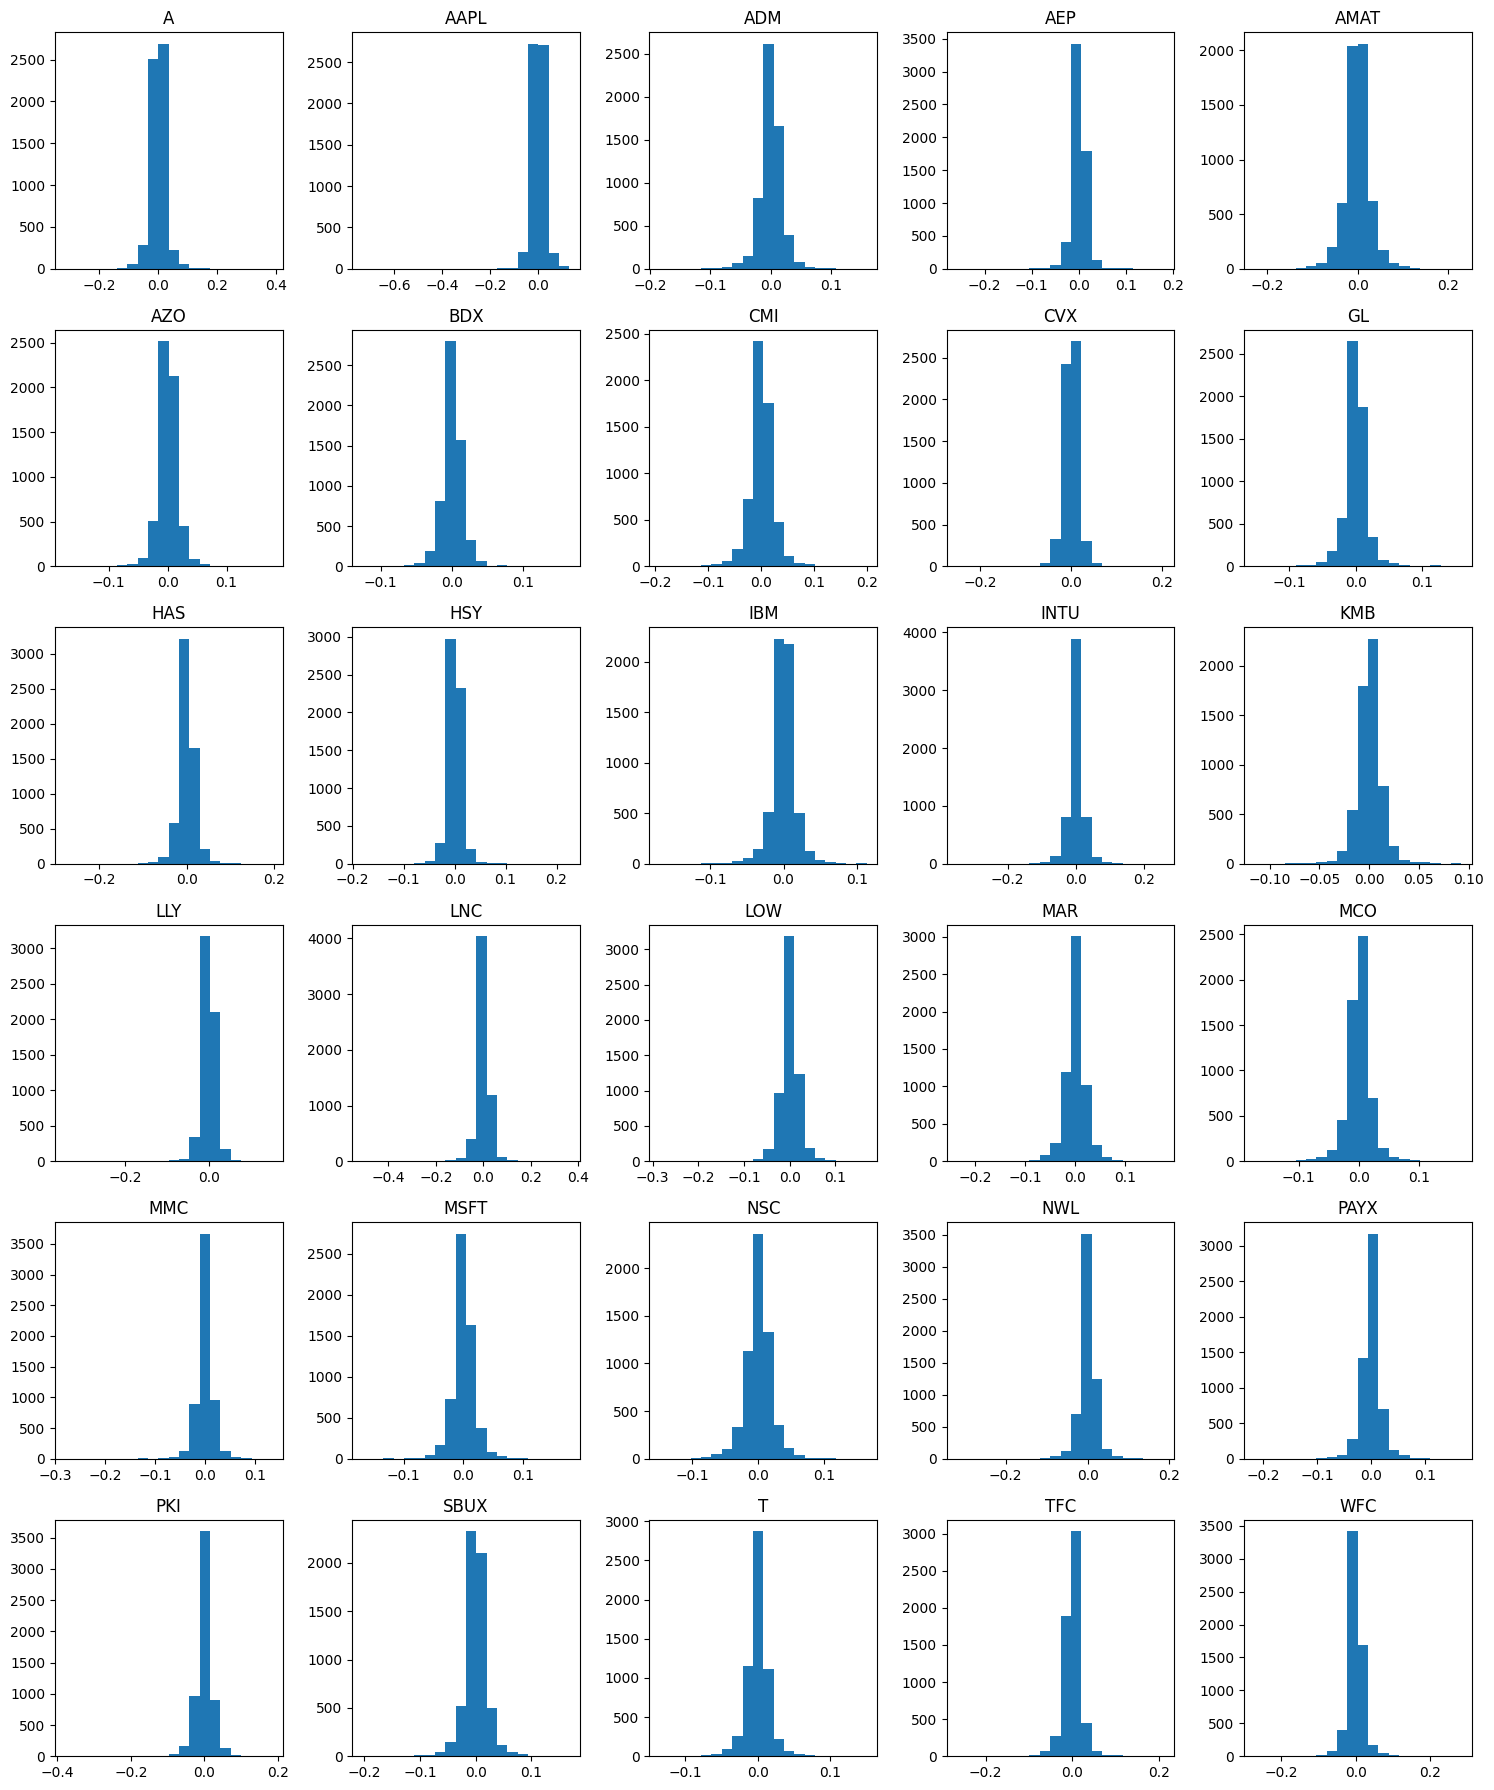

In [9]:
fig, axs = plt.subplots(6, 5, figsize=(15, 18))

# loop through each column of the dataframe
for i, col in enumerate(stock_df.columns):
    # calculate the row and column index for the subplot
    row = i // 5
    column = i % 5
    # create the histogram for the column
    axs[row, column].hist(stock_df[col], bins=20)
    
    # set the title for the subplot
    axs[row, column].set_title(col)
    
plt.tight_layout()
plt.show()

As mentioned previously, various macroeconomic indicators are added to the third and final set of RF models. The variables included are the unemployment rate, CPI, seasonally adjusted real GDP per capita in 2012 Dollars, the ten-year real interest rate, the thirty-year fixed mortgage rate average, the ICE BofA Corporate Index Total Return Index Value, and the CBOE Volatility Index.

[VISUALIZATIONS]

In [10]:
var_df

UNRATE  CPI  RGDPCAP   REALINT  MORT  TOTRETIND  VOLATILITY
DATE                                                                   
2000-01-01     NaN  NaN      NaN       NaN   NaN        NaN         NaN
2000-01-02     NaN  NaN      NaN       NaN   NaN        NaN         NaN
2000-01-03     NaN  NaN      NaN       NaN   NaN        NaN         NaN
2000-01-04     NaN  NaN      NaN       NaN   NaN       4.16        2.80
2000-01-05     NaN  NaN      NaN       NaN   NaN      -5.15       -0.60
...            ...  ...      ...       ...   ...        ...         ...
2023-02-25     0.2  NaN      NaN -0.362897  0.18     -16.61        0.53
2023-02-26     0.2  NaN      NaN -0.362897  0.18     -16.61        0.53
2023-02-27     0.2  NaN      NaN -0.362897  0.18       5.29       -0.72
2023-02-28     0.2  NaN      NaN -0.362897  0.18       1.20       -0.25
2023-03-01    -0.1  NaN      NaN  0.639434  0.18     -15.77       -0.12

[8461 rows x 7 columns]

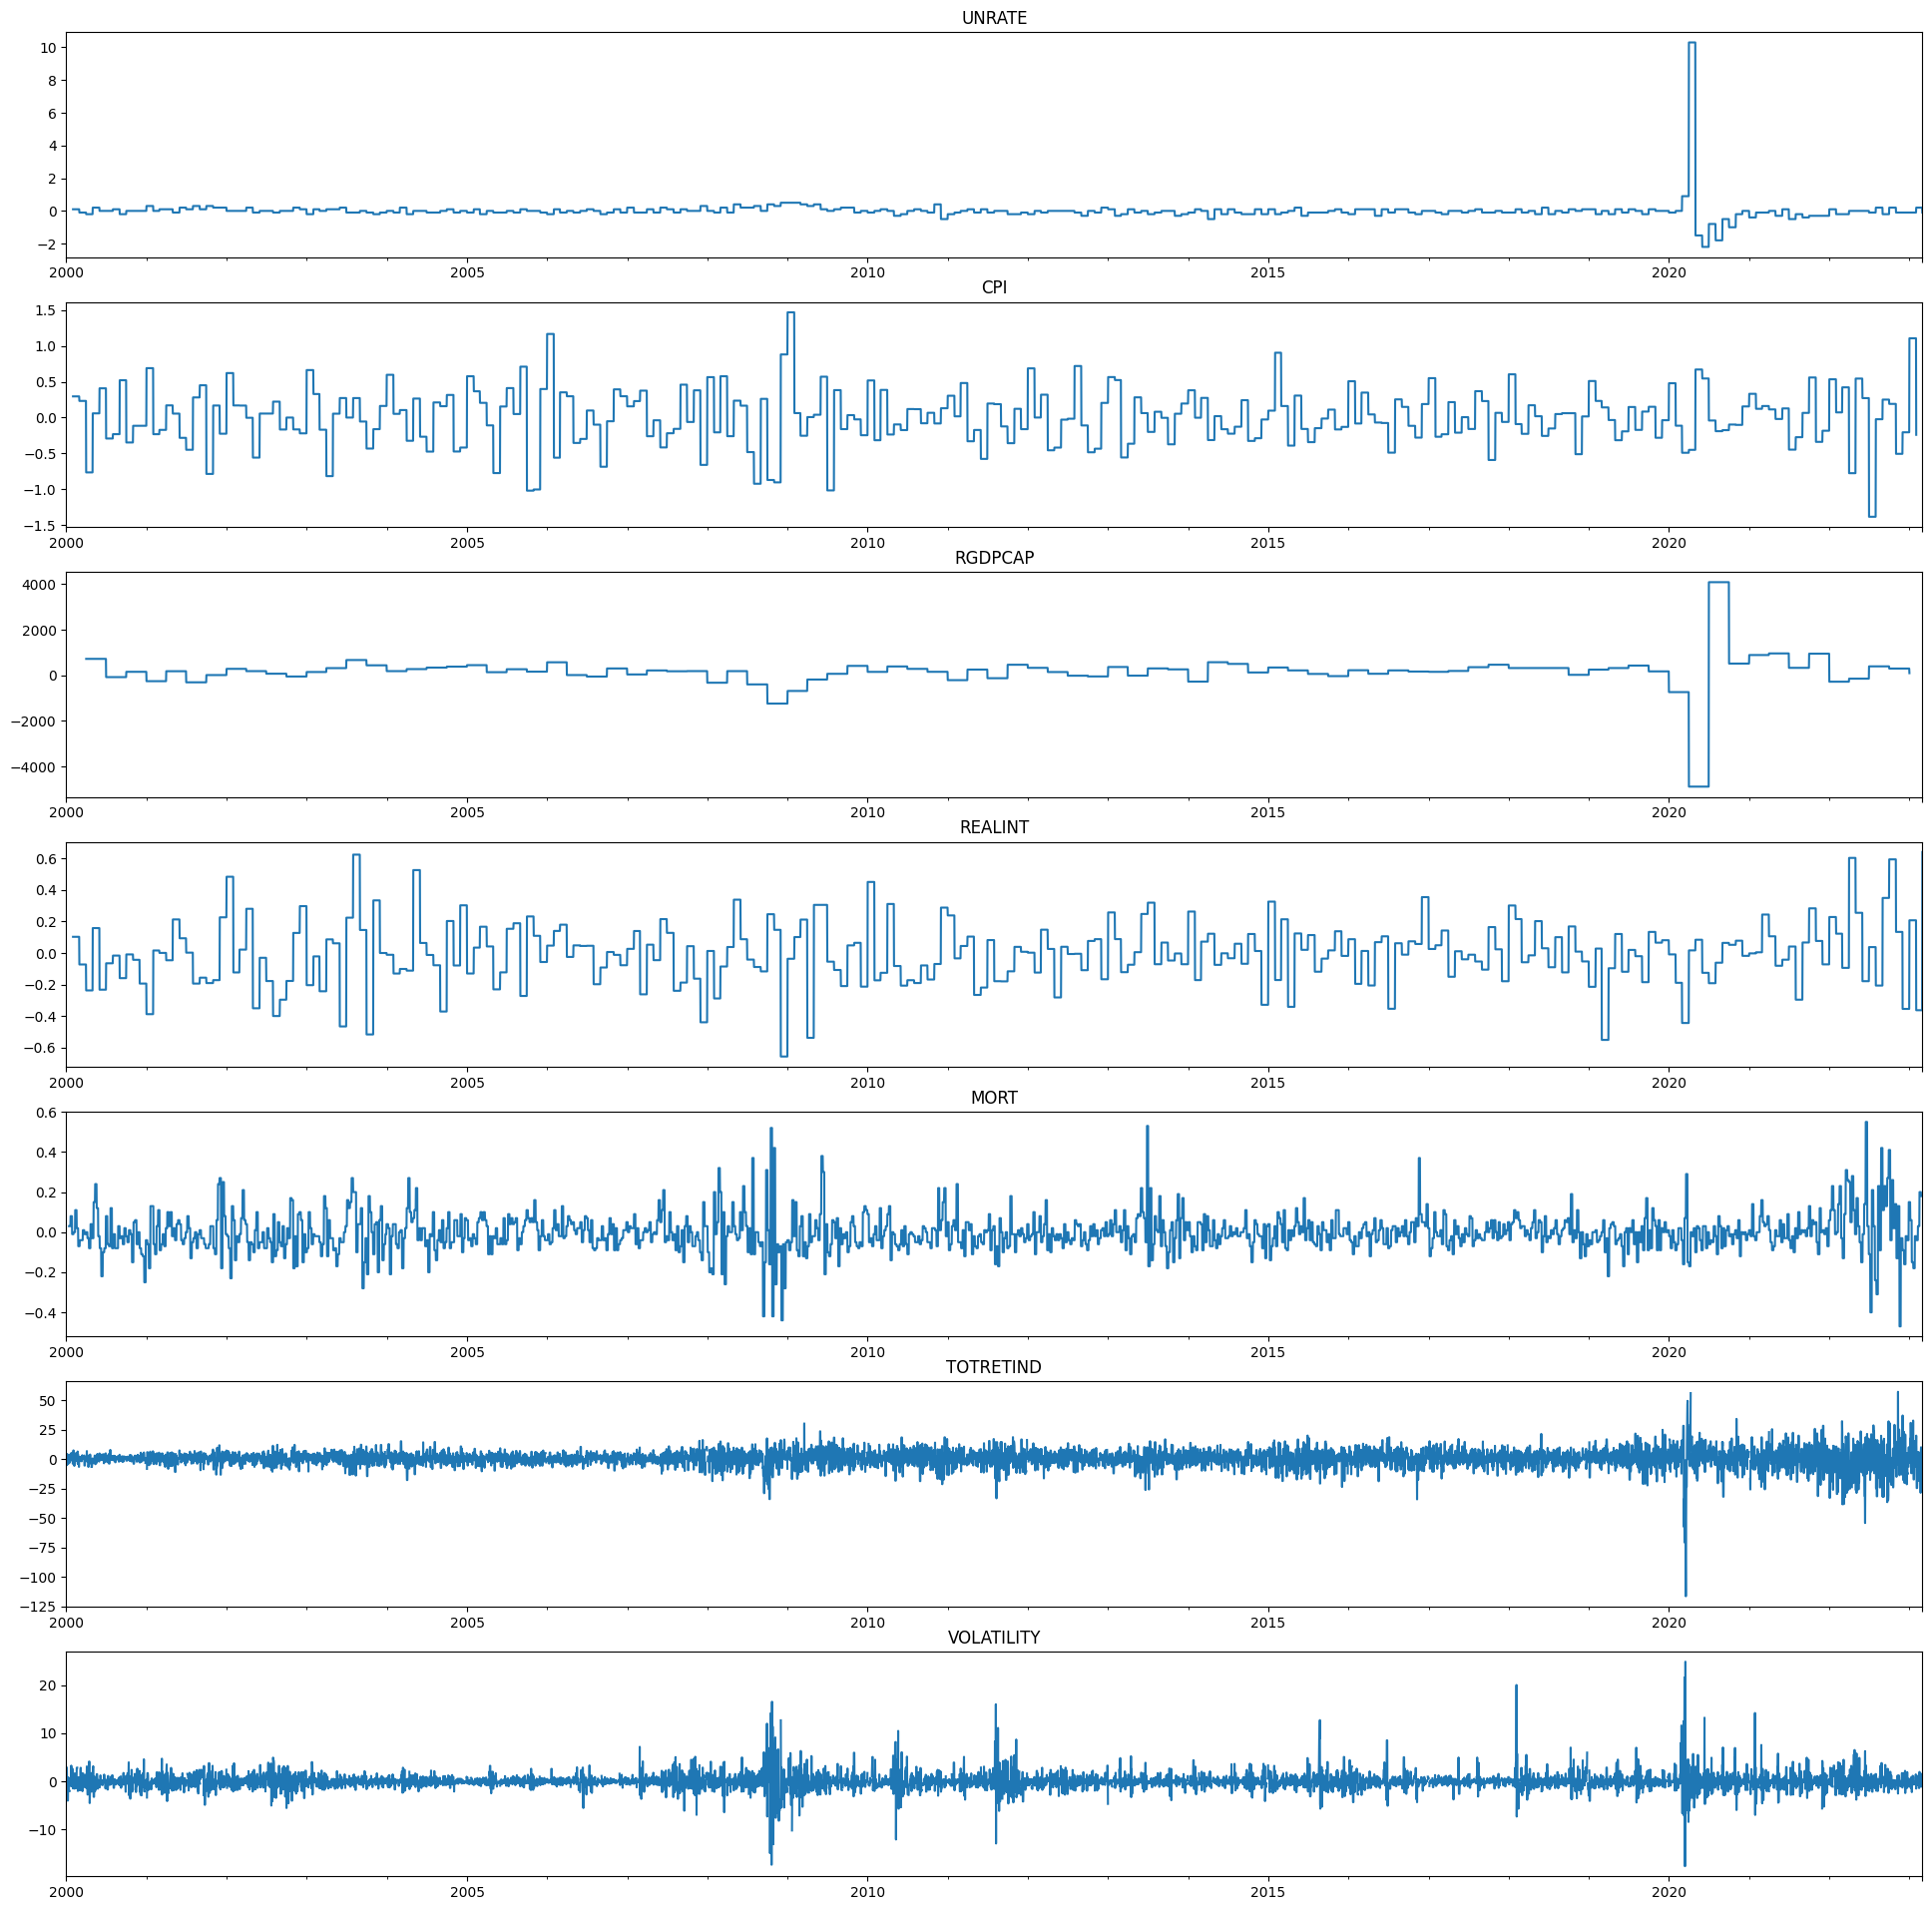

In [11]:
fig, axs = plt.subplots(len(var_df.columns), figsize = (24,24))
i = 0
for column in var_df:
    var_df[column].plot.line(ax = axs[i], title = column)
    axs[i].set(xlabel=None)
    i = i + 1

C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\3835505808.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  var_df.hist(bins=10, ax=ax)


array([[<AxesSubplot: title={'center': 'UNRATE'}>,
        <AxesSubplot: title={'center': 'CPI'}>,
        <AxesSubplot: title={'center': 'RGDPCAP'}>],
       [<AxesSubplot: title={'center': 'REALINT'}>,
        <AxesSubplot: title={'center': 'MORT'}>,
        <AxesSubplot: title={'center': 'TOTRETIND'}>],
       [<AxesSubplot: title={'center': 'VOLATILITY'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

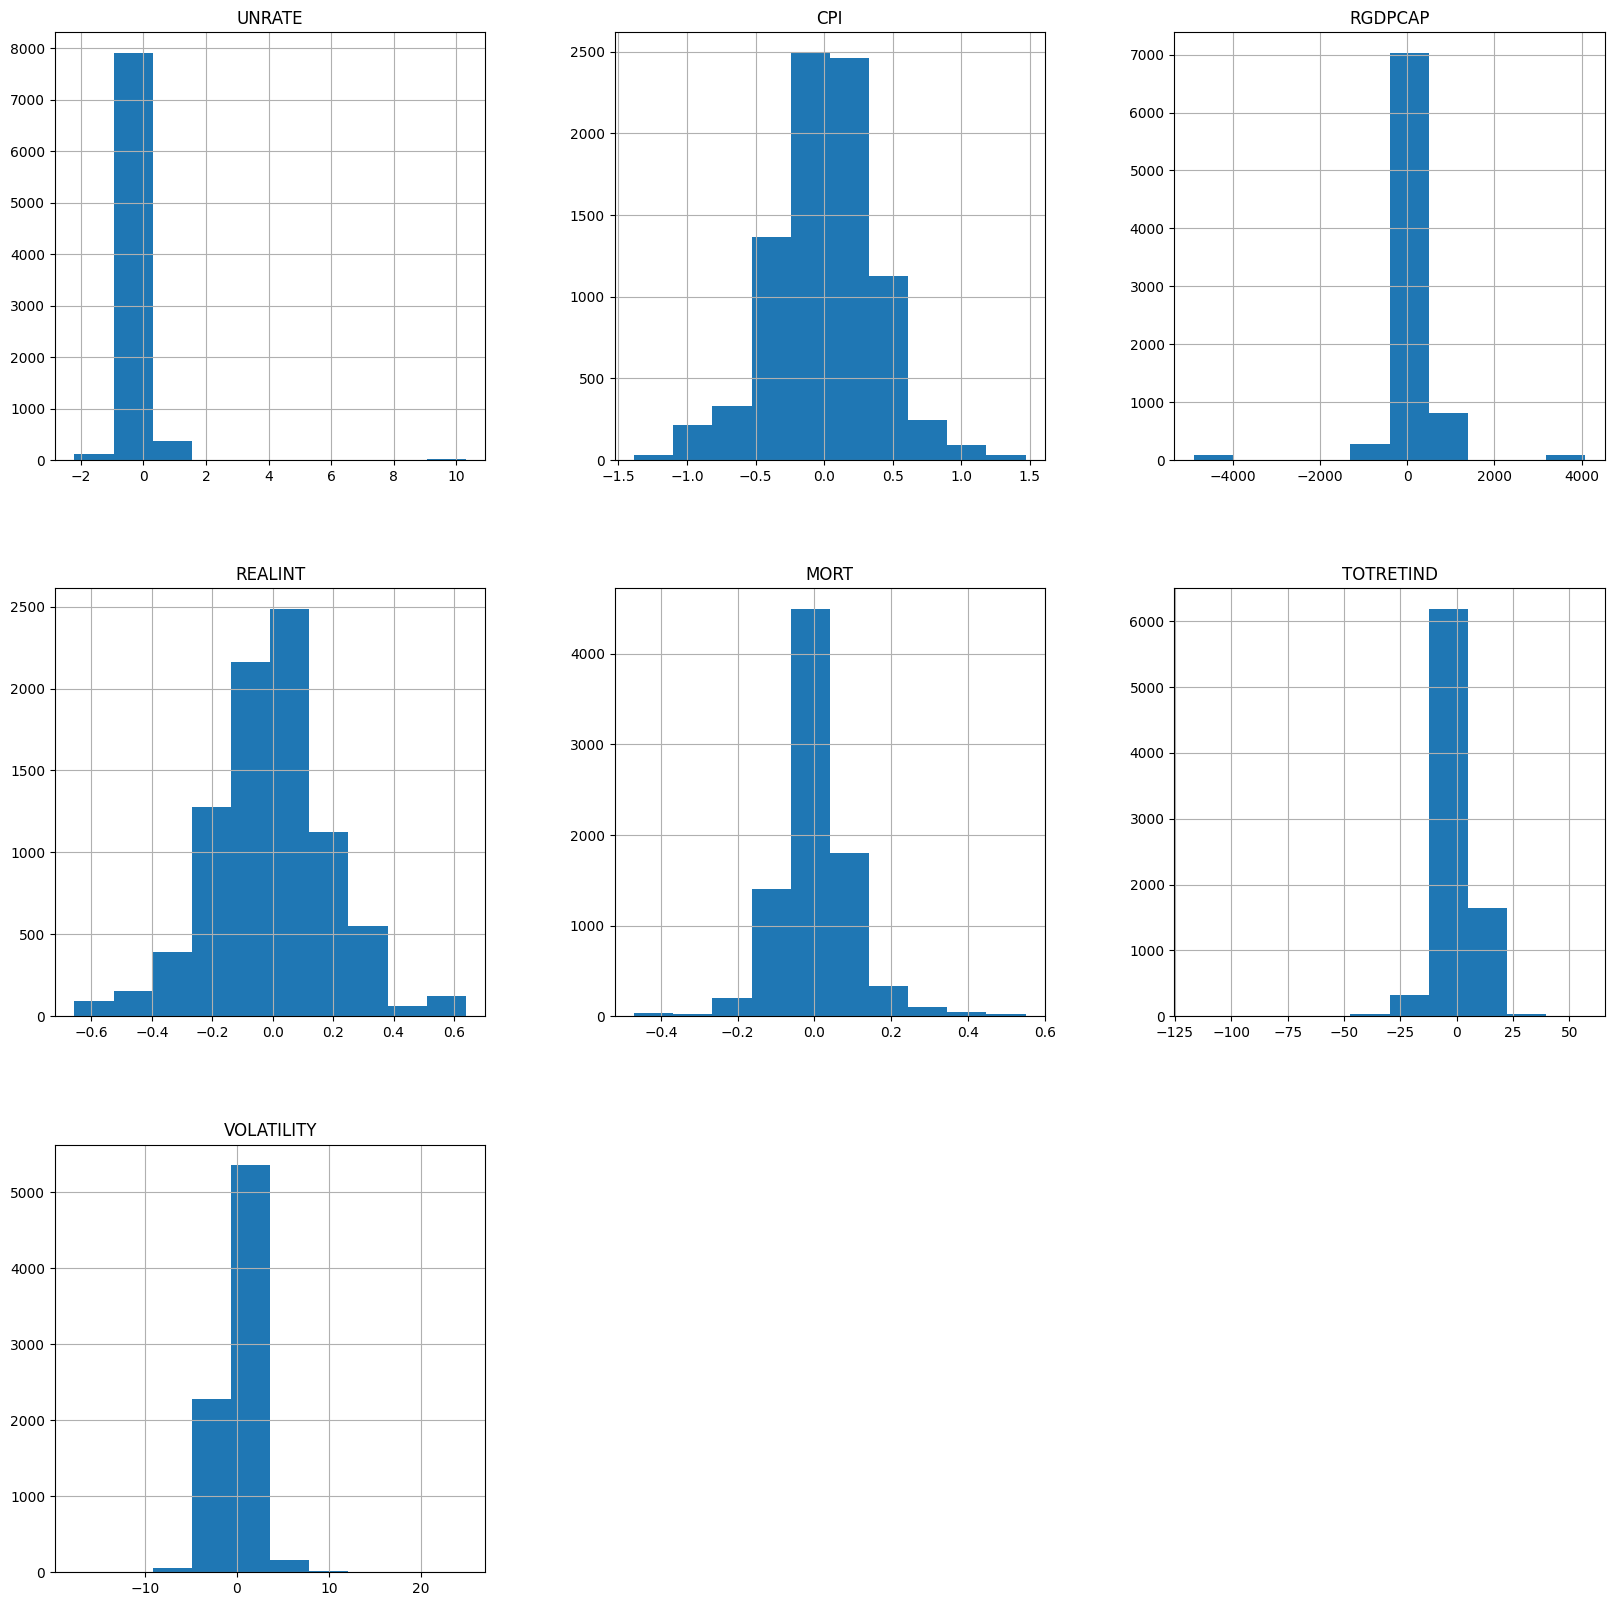

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
var_df.hist(bins=10, ax=ax)

In [13]:
final_df = pd.concat([stock_df, var_df], axis=1)
final_df

A      AAPL       ADM       AEP      AMAT       AZO  \
2000-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-04 -0.079464 -0.088077 -0.010471  0.011858 -0.050669 -0.004098   
2000-01-05 -0.064038  0.014527 -0.015916  0.036648 -0.038140 -0.004115   
...              ...       ...       ...       ...       ...       ...   
2023-04-24 -0.000144  0.001877  0.003720  0.003401  0.001321 -0.001601   
2023-04-25 -0.060349 -0.009480 -0.062560  0.001484 -0.026761  0.000456   
2023-04-26  0.020874 -0.000061  0.014778 -0.022827 -0.002716 -0.012590   
2023-04-27  0.000976  0.028000  0.012642  0.006052  0.012343  0.005994   
2023-04-28  0.016228  0.007513  0.000897 -0.004211  0.012016  0.000969   

                 BDX       CMI       CVX        GL  ...         T       TFC  \
2000-01-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2000-01-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2000-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2000-01-04 -0.026603 -0.028133  0.000000 -0.020068  ... -0.060292 -0.029486   
2000-01-05  0.007326  0.001358  0.017779  0.003248  ...  0.015418  0.012392   
...              ...       ...       ...       ...  ...       ...       ...   
2023-04-24  0.003096  0.008679  0.013858 -0.002885  ... -0.038606  0.011060   
2023-04-25 -0.004169 -0.006192 -0.014627 -0.010209  ... -0.001142 -0.044666   
2023-04-26 -0.009318 -0.024411 -0.017972 -0.008604  ... -0.017863  0.005571   
2023-04-27  0.018360  0.013342  0.005827  0.018720  ...  0.023558  0.025171   
2023-04-28  0.003829  0.017814  0.009716  0.011306  ...  0.003401  0.037528   

                 WFC  UNRATE  CPI  RGDPCAP  REALINT  MORT  TOTRETIND  \
2000-01-01       NaN     NaN  NaN      NaN      NaN   NaN        NaN   
2000-01-02       NaN     NaN  NaN      NaN      NaN   NaN        NaN   
2000-01-03       NaN     NaN  NaN      NaN      NaN   NaN        NaN   
2000-01-04 -0.050789     NaN  NaN      NaN      NaN   NaN       4.16   
2000-01-05 -0.010135     NaN  NaN      NaN      NaN   NaN      -5.15   
...              ...     ...  ...      ...      ...   ...        ...   
2023-04-24  0.005079     NaN  NaN      NaN      NaN   NaN        NaN   
2023-04-25 -0.021952     NaN  NaN      NaN      NaN   NaN        NaN   
2023-04-26 -0.027248     NaN  NaN      NaN      NaN   NaN        NaN   
2023-04-27  0.005056     NaN  NaN      NaN      NaN   NaN        NaN   
2023-04-28  0.002267     NaN  NaN      NaN      NaN   NaN        NaN   

            VOLATILITY  
2000-01-01         NaN  
2000-01-02         NaN  
2000-01-03         NaN  
2000-01-04         2.8  
2000-01-05        -0.6  
...                ...  
2023-04-24         NaN  
2023-04-25         NaN  
2023-04-26         NaN  
2023-04-27         NaN  
2023-04-28         NaN  

[8502 rows x 37 columns]

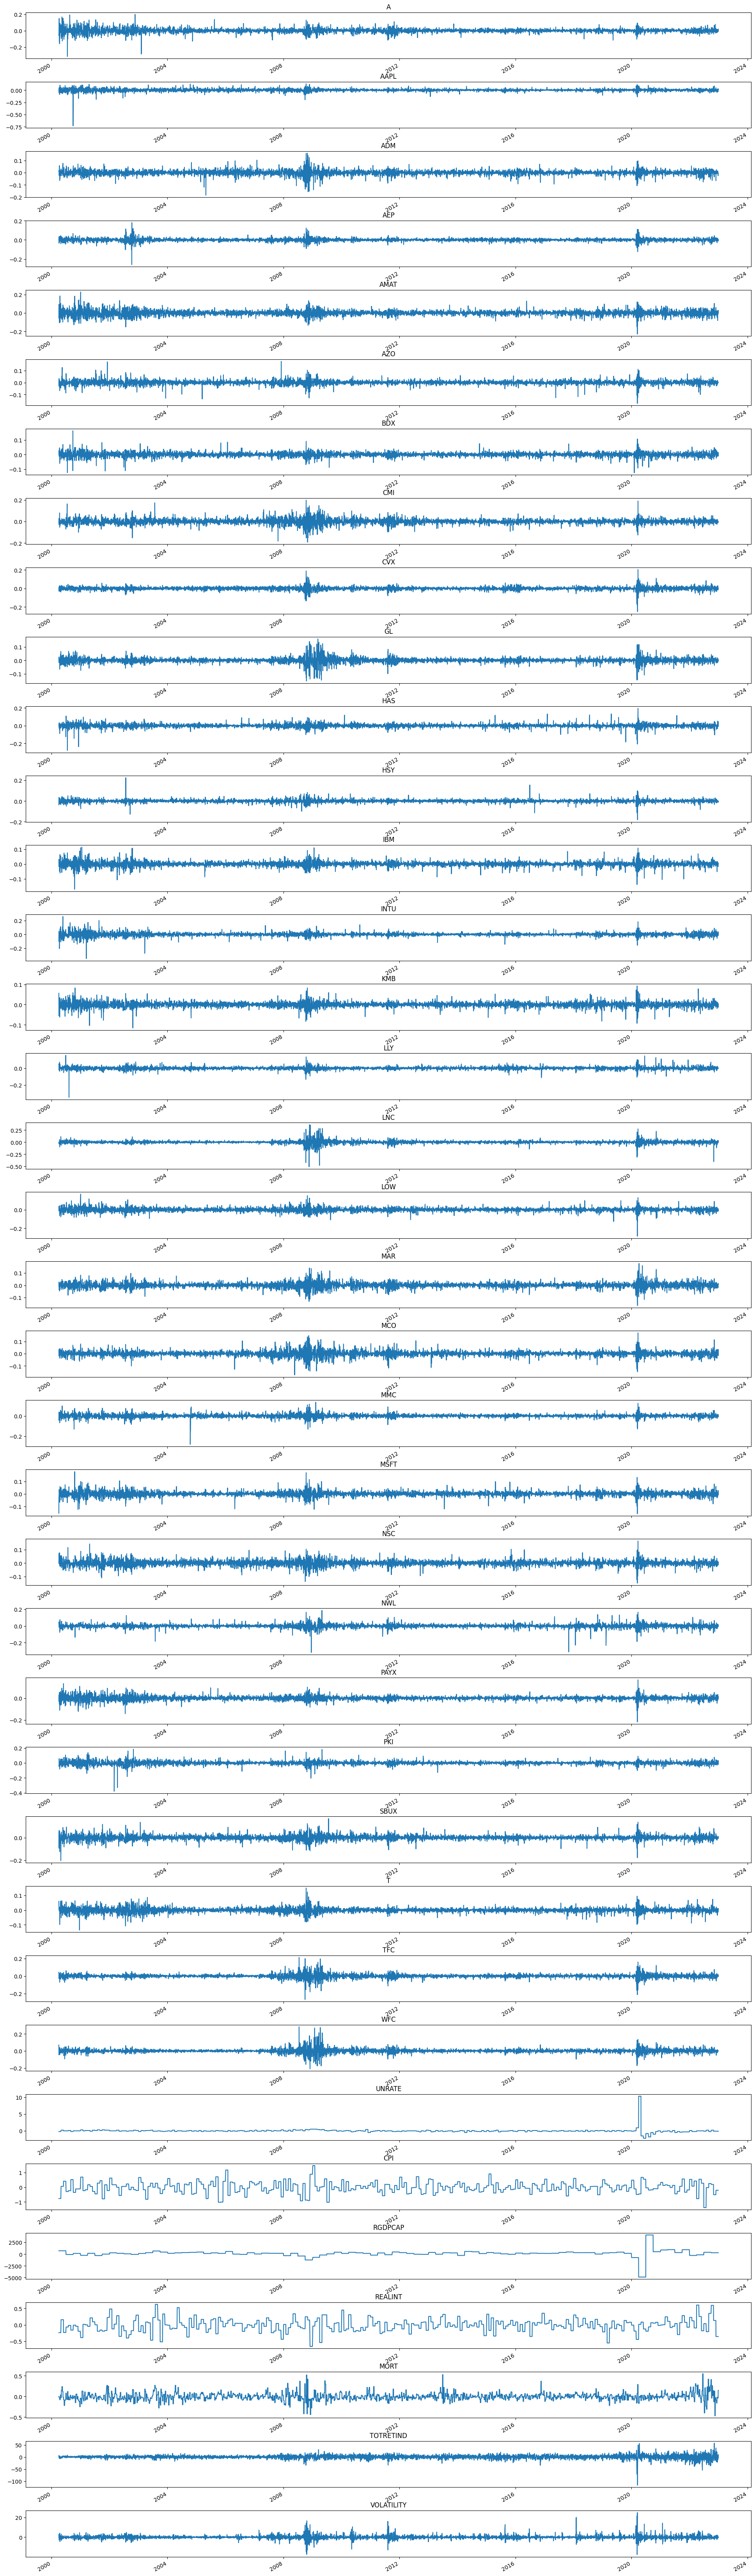

In [14]:
final_df = final_df.dropna(how="any", axis = 0)

fig, axs = plt.subplots(len(final_df.columns), figsize = (24,96))
fig.subplots_adjust(hspace=0.5)
i = 0
for column in final_df:
    axs[i].set(xlabel=None)
    final_df[column].plot.line(ax = axs[i], title = column)
    i = i + 1

As can be seen from the plots of the differenced variables, some of the variables that experienced large changes and volatility during the COVID-19 pandemic did not experience drastic changes during the Great Recession. Other variables (MORT for instance), however, experience relatively large amounts of volatility on a regular basis but do see increased volatility during those two periods. 

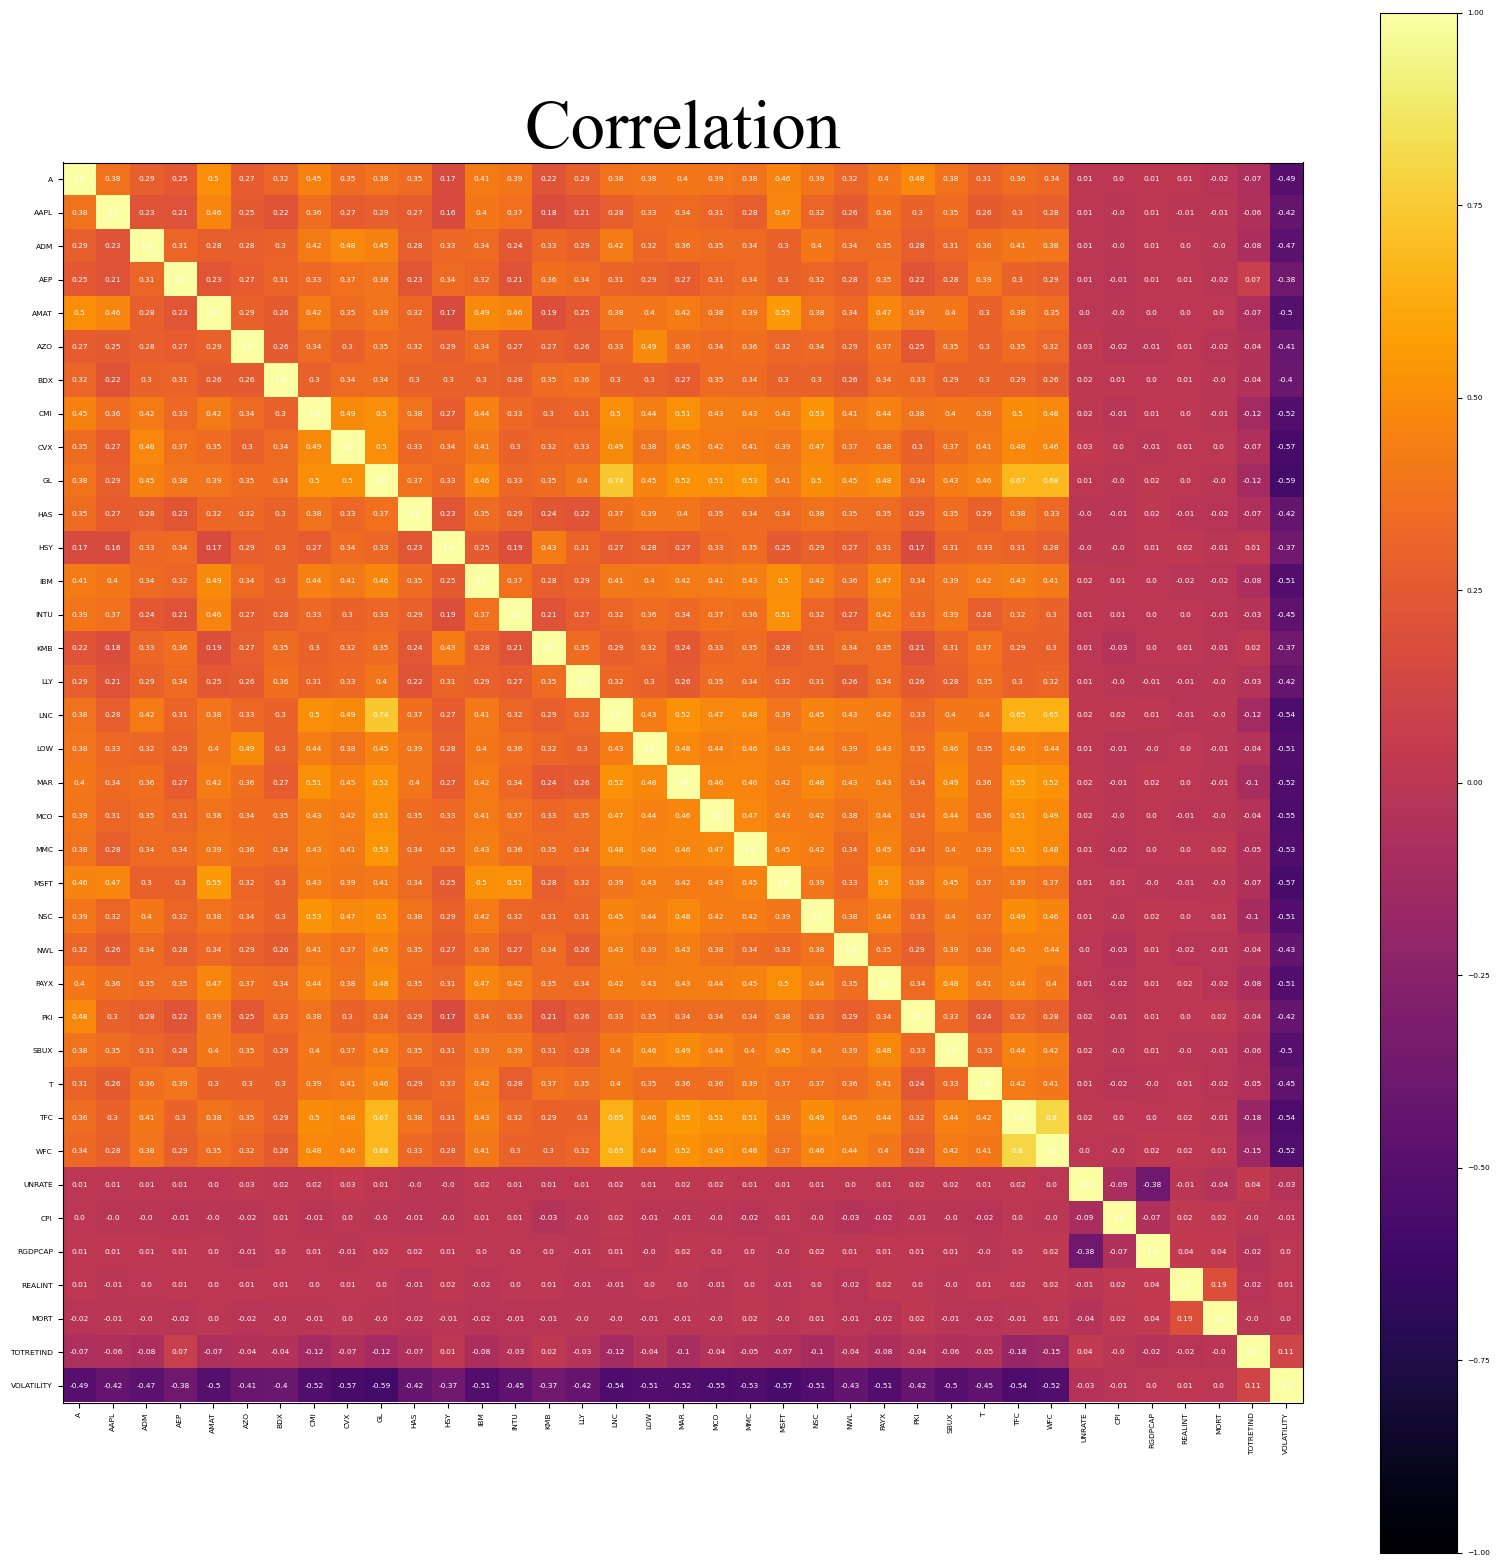

In [15]:
def corr_matrix_heatmap(data, dim = 20):
        fig, ax = plt.subplots(figsize = (dim,dim))
        im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "inferno")  
        labels = data.keys()
        num_vars = len(labels)
        tick_labels = [label.replace(" ","\n") for label in labels]
        tick_font_size = 200 / num_vars
        val_font_size = 200 / num_vars
        plt.rcParams.update({'font.size': tick_font_size})
        xticks = np.arange(num_vars)
        plt.xticks(xticks, tick_labels, fontsize = tick_font_size, rotation=90)
        yticks = np.arange(num_vars)
        plt.yticks(yticks, tick_labels, fontsize = tick_font_size)
        # put all options chosen above into use and create figure
        for i in range(len(labels)):
            for j in range(len(labels)):
                text = ax.text(i,j, str(round(data.values[i][j], 2)),
                              fontsize = val_font_size, ha = "center",
                               va = "center", color = "w")
        title_font = {"fontname":"Times New Roman"}  
        plt.title("Correlation", fontsize = 50, **title_font)   
        cbar = fig.colorbar(im)
        plt.show()
        
corr_matrix_heatmap(final_df.corr(), dim = 20)

The low correlation values between the additional variables and the stocks is not necessarily disheartening becuase the correlation function only measures the linear relationship. RF models are able to pick up on and account for nonlinear relationships

As touched on previously, a random forest model works by developing several decision trees trained on random subsets of the data. Each tree not only has access to a random subset of observation but also a limited number of variables. The final decision of the model is the decision held by the majority of the decision trees. To predict the outcomes of new data, the new variable must be run through each decision tree and the final “vote” taken. This kind of ensemble method results in a model that is robust to noise and outliers in the data and is less likely to overfit the data. Overfitting is when a model is overly specialized in the training data and, as a result, performs poorly on new data given. The benefits of this kind of robustness are especially obvious when thought of in conjunction with something like a recession or pandemic.

In order to construct a random forest, the dataset is subdivided into training and testing sets. The algorithm uses the training set to construct the decision trees and uses the testing set to evaluate the performance of the algorithm. The algorithm selects a random portion of the independent variables provided in the input. This reduces the correlation between the decision trees, helping to avoid overfitting the model. The number of features each tree has access to is up to the programmer but is usually set to the square root of the number of independent variables. Using these randomly selected features, the algorithm builds decision trees based on portion of the training set created earlier. This is done through a process called recursive partitioning. 

Recursive partitioning divides the dataset into increasingly smaller subsets based on the values of the independent variables. The algorithm uses Gini impurity to choose the split point that maximizes the separation of the data into subsets. Gini impurity measures the probability that a randomly chosen observation from the data has been misclassified based on the distribution of the dependent variable for the current sample. The splitting point is determined by finding the feature and value combination that minimizes the Gini impurity of the data after the split. 

Each observation in the dataset is sorted into the resulting subsets based on their relative value for that feature (observations with a value higher than the split point are placed in one subset, and those with lower values in another). This process is repeated until a stopping criterion is met. In the trees created herein, the stopping criterion is the maximum depth of the tree, 20. Once the stopping criterion is met, the algorithm assigns the last nodes in the tree a value based on those remaining in the subsets. One can then obtain the resulting decision tree’s prediction by starting at the root node and traveling down the tree, classifying the observation in the process. The label attached to the final node gives the prediction. This is done for each tree in the forest and the resulting predictions are averaged to obtain the final prediction. This process is conducted for each of the thirty randomly chosen stocks a total of three times: first, with only lagged dependent variables as the input; second, with the addition of other, related stocks; and third, with the addition of macroeconomic variables. 

In [16]:
for stock in stocks[:3]:
    tables = pd.read_html('https://finance.yahoo.com/quote/' + stock + '?p=' + stock + '&.tsrc=fin-srch')
    print(stock)
    print(tables[3])

HAS
                                   Symbol  Last Price  Change % Change
0                         MATMattel, Inc.       18.00    0.00    0.00%
1       LTHLife Time Group Holdings, Inc.       20.79    0.72   +3.59%
2           PTONPeloton Interactive, Inc.        8.88    0.12   +1.37%
3                         FNKOFunko, Inc.        9.86    0.52   +5.57%
4  SIXSix Flags Entertainment Corporation       24.27   -0.01   -0.04%
INTU
                             Symbol  Last Price  Change % Change
0               NOWServiceNow, Inc.      459.42    5.08   +1.12%
1                ADSKAutodesk, Inc.      194.79    4.68   +2.46%
2         TEAMAtlassian Corporation      147.66   -6.11   -3.97%
3  CDNSCadence Design Systems, Inc.      209.45    1.59   +0.76%
4                 HUBSHubSpot, Inc.      420.95   -8.14   -1.90%
CVX
                                    Symbol  Last Price  Change % Change
0               XOMExxon Mobil Corporation      118.34    1.51   +1.29%
1                          

In [17]:
related_dict = {"HAS": ["MAT", "LTH", "PTON", "SIX", "FNKO"],
               "INTU": ["ADSK", "TEAM", "NOW", "HUBS", "CDNS"],
               "CVX": ["XOM", "BP", "SHEL", "TTE", "SU"],
               "T": ["VZ", "TMUS", "CMCSA", "LUMN", "VOD"],
               "MMC": ["AON", "AJG", "WTW", "BRO", "ERIE"],
               "NWL": ["REVRQ", "KMB", "CLX", "CL", "COTY"],
               "LLY": ["MRK", "ABBV", "BMY", "JNJ", "AMGN"],
               "CMI": ["ITW", "ETN", "EMR", "PH", "DOV"],
               "KMB": ["CLX", "CL", "PG", "UL", "CHD"],
               "AAPL": ["SONY", "GPRO", "SONO", "VUZI", "SSNLF"],
               "ADM": ["BG", "TSN", "CALM", "FDP", "APPH"],
               "AEP": ["DUK", "ED", "D", "EXC", "SO"],
               "A": ["WAT", "PKI", "MTD", "TMO", "DHR"],
               "MAR": ["HLT", "H", "WH", "IHG", "CHH"],
               "PAYX": ["ADP", "RHI", "MAN", "NSP", "TNET"],
               "MSFT": ["CRWD", "PLTR", "NET", "SQ", "ADBE"],
               "IBM": ["KD", "XRX", "ACN", "FISV", "FIS"],
               "LNC": ["PRU", "UNM", "MET", "JXN", "MFC"],
               "MCO": ["SPGI", "MSCI", "CME", "NDAQ", "ICE"],
               "LOW": ["HD", "FND", "LL", "ARHS", "HVT"],
               "BDX": ["EMBC", "WST", "BAX", "RMD", "TFX"],
               "GL": ["UNM", "PUK", "CNO", "FG", "PRI"],
               "NSC": ["UNP", "CSX", "CNI", "CP", "WAB"],
               "TFC": ["KEY", "USB", "PNC", "FITB", "RF"],
               "PKI": ["WAT", "CRL", "MTD", "QGEN", "DGX"],
               "HSY": ["MDLZ", "TR", "RMCF", "LDSVF", "TROLB"],
               "SBUX": ["MCD", "CMG", "DPZ", "BROS", "YUM"],
               "WFC": ["C", "JPM", "BAC", "CS", "UBS"],
               "AZO": ["ORLY", "AAP", "ULTA", "GPC", "TSCO"],
               "AMAT": ["LRCX", "KLAC", "ASML", "TER", "ACLS"]}

In [18]:
extra_stocks = []
for key in related_dict:
    extra_stocks.extend(related_dict[key])
extra_stocks = set(extra_stocks)
extra_stocks, len(extra_stocks)

({'AAP',
  'ABBV',
  'ACLS',
  'ACN',
  'ADBE',
  'ADP',
  'ADSK',
  'AJG',
  'AMGN',
  'AON',
  'APPH',
  'ARHS',
  'ASML',
  'BAC',
  'BAX',
  'BG',
  'BMY',
  'BP',
  'BRO',
  'BROS',
  'C',
  'CALM',
  'CDNS',
  'CHD',
  'CHH',
  'CL',
  'CLX',
  'CMCSA',
  'CME',
  'CMG',
  'CNI',
  'CNO',
  'COTY',
  'CP',
  'CRL',
  'CRWD',
  'CS',
  'CSX',
  'D',
  'DGX',
  'DHR',
  'DOV',
  'DPZ',
  'DUK',
  'ED',
  'EMBC',
  'EMR',
  'ERIE',
  'ETN',
  'EXC',
  'FDP',
  'FG',
  'FIS',
  'FISV',
  'FITB',
  'FND',
  'FNKO',
  'GPC',
  'GPRO',
  'H',
  'HD',
  'HLT',
  'HUBS',
  'HVT',
  'ICE',
  'IHG',
  'ITW',
  'JNJ',
  'JPM',
  'JXN',
  'KD',
  'KEY',
  'KLAC',
  'KMB',
  'LDSVF',
  'LL',
  'LRCX',
  'LTH',
  'LUMN',
  'MAN',
  'MAT',
  'MCD',
  'MDLZ',
  'MET',
  'MFC',
  'MRK',
  'MSCI',
  'MTD',
  'NDAQ',
  'NET',
  'NOW',
  'NSP',
  'ORLY',
  'PG',
  'PH',
  'PKI',
  'PLTR',
  'PNC',
  'PRI',
  'PRU',
  'PTON',
  'PUK',
  'QGEN',
  'REVRQ',
  'RF',
  'RHI',
  'RMCF',
  'RMD',
  'SHEL',


In [19]:
extra_stock_df = pdr.get_data_yahoo(extra_stocks, start = start, end = end)["Adj Close"]
extra_stock_df = np.log(extra_stock_df).diff()
extra_stock_df

[*********************100%***********************]  145 of 145 completed


C:\Users\hthog\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


AAP      ABBV      ACLS       ACN      ADBE       ADP  \
Date                                                                     
2000-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-04       NaN       NaN       NaN       NaN -0.087618  0.000000   
2000-01-05       NaN       NaN       NaN       NaN  0.019578 -0.009662   
2000-01-06       NaN       NaN       NaN       NaN  0.008130  0.013261   
2000-01-07       NaN       NaN       NaN       NaN  0.047440  0.022499   
...              ...       ...       ...       ...       ...       ...   
2023-04-24 -0.010822  0.010230  0.005013  0.003324 -0.000874  0.001207   
2023-04-25 -0.024342  0.004985 -0.057663 -0.023908 -0.020752 -0.017699   
2023-04-26 -0.011783 -0.018978 -0.007850  0.001882 -0.017826 -0.004071   
2023-04-27  0.020791 -0.083288 -0.013651  0.015513  0.022765  0.024967   
2023-04-28  0.005031  0.015001  0.016105  0.017419  0.016396  0.017609   

                ADSK       AJG      AMGN       AON  ...      VUZI        VZ  \
Date                                                ...                       
2000-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2000-01-04 -0.049914 -0.046239 -0.079546 -0.022691  ...       NaN -0.032859   
2000-01-05 -0.065063  0.004106  0.033830  0.029081  ...       NaN  0.032859   
2000-01-06 -0.062859 -0.001795  0.016495  0.034432  ...       NaN -0.005092   
2000-01-07  0.112049  0.038016  0.106587  0.050986  ...       NaN -0.007412   
...              ...       ...       ...       ...  ...       ...       ...   
2023-04-24  0.008976 -0.001686  0.002416 -0.006074  ... -0.023654 -0.005912   
2023-04-25 -0.029169 -0.001109  0.001717 -0.003626  ... -0.043485  0.005376   
2023-04-26 -0.001631 -0.008482 -0.025101 -0.009183  ...  0.027399 -0.010240   
2023-04-27  0.001105  0.017419  0.006428  0.016661  ...  0.070433  0.049409   
2023-04-28  0.024319 -0.004747 -0.002500 -0.021494  ...  0.012516  0.001031   

                 WAB       WAT        WH       WST       WTW       XOM  \
Date                                                                     
2000-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-04 -0.014653 -0.049762       NaN  0.010277       NaN -0.019340   
2000-01-05 -0.003697  0.060625       NaN -0.004098       NaN  0.053081   
2000-01-06 -0.041594 -0.030472       NaN -0.010320       NaN  0.050406   
2000-01-07 -0.039375  0.030472       NaN  0.010320       NaN -0.002939   
...              ...       ...       ...       ...       ...       ...   
2023-04-24  0.010301  0.010470 -0.000145  0.016508 -0.004154  0.018702   
2023-04-25 -0.006922 -0.057809 -0.016527 -0.040566 -0.002793 -0.014315   
2023-04-26 -0.043293  0.013607 -0.033744  0.000644 -0.007625 -0.009225   
2023-04-27  0.012664  0.005445  0.018737 -0.005643 -0.051610  0.011882   
2023-04-28 -0.000716  0.006748  0.021035  0.016805  0.025318  0.012842   

                 XRX       YUM  
Date                            
2000-01-03       NaN       NaN  
2000-01-04 -0.047628 -0.020305  
2000-01-05  0.050209  0.005114  
2000-01-06 -0.020834 -0.008539  
2000-01-07  0.023408 -0.022551  
...              ...       ...  
2023-04-24 -0.012432  0.004112  
2023-04-25  0.128275 -0.007878  
2023-04-26 -0.004541  0.001450  
2023-04-27  0.019318  0.012887  
2023-04-28 -0.000638  0.005564  

[5868 rows x 145 columns]

In [20]:
start_date = "2002-01-01"
missing_counts = extra_stock_df.loc[start_date:].isna().sum()
columns_above_threshold = missing_counts.loc[missing_counts > 0].index.tolist()
print(columns_above_threshold, len(columns_above_threshold))

['ABBV', 'APPH', 'ARHS', 'BROS', 'CME', 'CMG', 'CNO', 'COTY', 'CRWD', 'DPZ', 'EMBC', 'EXC', 'FG', 'FND', 'FNKO', 'GPRO', 'H', 'HLT', 'HUBS', 'ICE', 'IHG', 'JXN', 'KD', 'LDSVF', 'LL', 'LTH', 'MSCI', 'NDAQ', 'NET', 'NOW', 'PLTR', 'PRI', 'PTON', 'SIX', 'SONO', 'SQ', 'SSNLF', 'TEAM', 'TMUS', 'TNET', 'TROLB', 'ULTA', 'VUZI', 'WH', 'WTW'] 45


In [21]:
related_dict = {"HAS": ["MAT"],
               "INTU": ["ADSK", "CDNS"],
               "CVX": ["XOM", "BP", "SHEL", "TTE", "SU"],
               "T": ["VZ", "CMCSA", "LUMN", "VOD"],
               "MMC": ["AON", "AJG", "BRO", "ERIE"],
               "NWL": ["REVRQ", "KMB", "CLX", "CL"],
               "LLY": ["MRK", "BMY", "JNJ", "AMGN"],
               "CMI": ["ITW", "ETN", "EMR", "PH", "DOV"],
               "KMB": ["CLX", "CL", "PG", "UL", "CHD"],
               "AAPL": ["SONY"],
               "ADM": ["BG", "TSN", "CALM", "FDP"],
               "AEP": ["DUK", "ED", "D", "SO"],
               "A": ["WAT", "PKI", "MTD", "TMO", "DHR"],
               "MAR": ["CHH"],
               "PAYX": ["ADP", "RHI", "MAN", "NSP"],
               "MSFT": ["ADBE"],
               "IBM": ["XRX", "ACN", "FISV", "FIS"],
               "LNC": ["PRU", "UNM", "MET", "MFC"],
               "MCO": ["SPGI"],
               "LOW": ["HD", "HVT"],
               "BDX": ["WST", "BAX", "RMD", "TFX"],
               "GL": ["UNM", "PUK"],
               "NSC": ["UNP", "CSX", "CNI", "CP", "WAB"],
               "TFC": ["KEY", "USB", "PNC", "FITB", "RF"],
               "PKI": ["WAT", "CRL", "MTD", "QGEN", "DGX"],
               "HSY": ["MDLZ", "TR", "RMCF"],
               "SBUX": ["MCD", "YUM"],
               "WFC": ["C", "JPM", "BAC", "CS", "UBS"],
               "AZO": ["ORLY", "AAP", "GPC", "TSCO"],
               "AMAT": ["LRCX", "KLAC", "ASML", "TER", "ACLS"]}
extra_stocks = []
for key in related_dict:
    extra_stocks.extend(related_dict[key])
extra_stocks = list(set(extra_stocks))
extra_stocks_df = extra_stock_df[extra_stocks]
extra_stocks_df

VOD       PRU      FITB         C       AJG        SU  \
Date                                                                     
2000-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-04 -0.049169       NaN -0.042948 -0.063282 -0.046239  0.032986   
2000-01-05 -0.024162       NaN -0.015052  0.039414  0.004106  0.082083   
2000-01-06 -0.020591       NaN  0.034469  0.047179 -0.001795 -0.027550   
2000-01-07  0.020591       NaN -0.006430 -0.004618  0.038016  0.006959   
...              ...       ...       ...       ...       ...       ...   
2023-04-24 -0.000896  0.001865 -0.015402  0.000000 -0.001686  0.004589   
2023-04-25  0.007143 -0.023447 -0.053123 -0.023317 -0.001109 -0.023492   
2023-04-26  0.037543 -0.002148 -0.003123 -0.021951 -0.008482 -0.019950   
2023-04-27  0.027051  0.022329  0.010113  0.003621  0.017419  0.037209   
2023-04-28 -0.003342  0.016340  0.013836  0.011754 -0.004747  0.030143   

                 WAB        RF      SPGI       ACN  ...        CP       TTE  \
Date                                                ...                       
2000-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2000-01-04 -0.014653 -0.029692 -0.047080       NaN  ...  0.005971 -0.029568   
2000-01-05 -0.003697 -0.005494 -0.013544       NaN  ...  0.026434  0.000000   
2000-01-06 -0.041594  0.002751 -0.027651       NaN  ...  0.048100 -0.022517   
2000-01-07 -0.039375  0.010929  0.009302       NaN  ...  0.016439 -0.002975   
...              ...       ...       ...       ...  ...       ...       ...   
2023-04-24  0.010301 -0.003273 -0.011610  0.003324  ...  0.000123  0.014551   
2023-04-25 -0.006922 -0.027141 -0.007072 -0.023908  ... -0.025286 -0.017708   
2023-04-26 -0.043293 -0.005066 -0.015001  0.001882  ... -0.023356  0.002053   
2023-04-27  0.012664  0.015678  0.044599  0.015513  ...  0.006821 -0.009671   
2023-04-28 -0.000716  0.014341  0.019495  0.017419  ...  0.011096  0.018311   

                 CLX       AAP       TMO        PG     CMCSA      ACLS  \
Date                                                                     
2000-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-04 -0.027046       NaN -0.038221 -0.019429 -0.077817       NaN   
2000-01-05  0.025774       NaN  0.008621 -0.019209 -0.026356       NaN   
2000-01-06  0.008867       NaN  0.000000  0.045032  0.037850       NaN   
2000-01-07  0.054001       NaN  0.012793  0.076918 -0.031933       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-04-24 -0.000242 -0.010822  0.004573  0.001792 -0.014143  0.005013   
2023-04-25  0.005229 -0.024342 -0.046183  0.000256 -0.008366 -0.057663   
2023-04-26 -0.008893 -0.011783 -0.028203 -0.011641 -0.010352 -0.007850   
2023-04-27  0.016686  0.020791  0.018381  0.012153  0.097747 -0.013651   
2023-04-28 -0.003436  0.005031  0.021642 -0.000575  0.026949  0.016105   

                 TER       DOV  
Date                            
2000-01-03       NaN       NaN  
2000-01-04 -0.030803 -0.018692  
2000-01-05 -0.022141  0.004345  
2000-01-06 -0.050284  0.004326  
2000-01-07  0.021077  0.026972  
...              ...       ...  
2023-04-24 -0.003988  0.006210  
2023-04-25 -0.033866 -0.021357  
2023-04-26 -0.010870 -0.032490  
2023-04-27 -0.032229  0.026422  
2023-04-28  0.011114  0.010869  

[5868 rows x 100 columns]

In [22]:
final_df = final_df.join(extra_stock_df, how='left', rsuffix='_2')
final_df

A      AAPL       ADM       AEP      AMAT       AZO  \
2000-04-03 -0.059423 -0.018580  0.018019  0.000000 -0.054509  0.004494   
2000-04-04 -0.047006 -0.046051  0.005935  0.032993  0.094800 -0.029581   
2000-04-05  0.036105  0.023771  0.005900  0.026027  0.059950  0.022832   
2000-04-06  0.079894 -0.040603  0.011696 -0.034174  0.023712  0.033299   
2000-04-07  0.150061  0.051093 -0.023531 -0.002048  0.073941  0.010858   
...              ...       ...       ...       ...       ...       ...   
2022-12-22 -0.007222 -0.024060 -0.008308 -0.009167 -0.081618 -0.011013   
2022-12-23  0.001475 -0.002802  0.012014  0.012831 -0.003901  0.011083   
2022-12-28 -0.009811 -0.031166 -0.024166 -0.009705 -0.011711  0.002974   
2022-12-29  0.020055  0.027931 -0.005355  0.006793  0.030415  0.001117   
2022-12-30 -0.008086  0.002466 -0.002904 -0.011102  0.002468  0.000730   

                 BDX       CMI       CVX        GL  ...      VUZI        VZ  \
2000-04-03  0.025793 -0.008354 -0.001353  0.024034  ...       NaN  0.031205   
2000-04-04  0.002312  0.029755 -0.027455 -0.015959  ...       NaN  0.010843   
2000-04-05  0.004609 -0.014767 -0.026085  0.014535  ...       NaN -0.008862   
2000-04-06 -0.006921 -0.028502  0.016295  0.005291  ...       NaN  0.037273   
2000-04-07 -0.011642 -0.008539 -0.028512 -0.005291  ...       NaN -0.008666   
...              ...       ...       ...       ...  ...       ...       ...   
2022-12-22  0.000907 -0.006378 -0.015111 -0.017413  ... -0.026740  0.013931   
2022-12-23  0.003464  0.002407  0.030448  0.014505  ... -0.010899  0.002607   
2022-12-28 -0.008576 -0.011496 -0.014863 -0.007151  ...  0.006006 -0.011273   
2022-12-29  0.014823  0.001780  0.007543  0.007151  ...  0.074963  0.011528   
2022-12-30 -0.010172  0.002314  0.006540 -0.001243  ...  0.011050  0.003560   

                 WAB       WAT        WH       WST       WTW       XOM  \
2000-04-03  0.057158 -0.089161       NaN -0.032625       NaN  0.031549   
2000-04-04 -0.033902  0.010703       NaN -0.010257       NaN  0.024541   
2000-04-05  0.005731  0.041021       NaN  0.020410       NaN -0.033902   
2000-04-06  0.005698  0.015546       NaN -0.015268       NaN  0.024769   
2000-04-07  0.028013  0.043956       NaN -0.010309       NaN -0.027123   
...              ...       ...       ...       ...       ...       ...   
2022-12-22 -0.013988 -0.007177 -0.003033  0.002468 -0.005351 -0.020380   
2022-12-23  0.003889  0.006831  0.014932 -0.000553  0.008589  0.026101   
2022-12-28 -0.014785 -0.016938 -0.012739 -0.023464 -0.011680 -0.016563   
2022-12-29  0.010114  0.015060  0.016288  0.032924  0.017772  0.007538   
2022-12-30 -0.005595 -0.009587  0.010573 -0.015306 -0.002695  0.010023   

                 XRX       YUM  
2000-04-03 -0.036724 -0.024441  
2000-04-04  0.012392  0.028457  
2000-04-05  0.004914  0.033500  
2000-04-06  0.070952 -0.021548  
2000-04-07  0.013606  0.001978  
...              ...       ...  
2022-12-22 -0.012877  0.000311  
2022-12-23 -0.003416  0.000621  
2022-12-28 -0.022705 -0.004552  
2022-12-29  0.025866  0.005245  
2022-12-30  0.007563 -0.014802  

[5522 rows x 182 columns]

In [23]:
var_dict = {}
for stock in stocks:
    new_df = final_df[[stock, "UNRATE", "CPI", "RGDPCAP", "REALINT", "MORT", "TOTRETIND", "VOLATILITY"]]
    new_df["LAG1"] = new_df[stock].shift(1)
    new_df["LAG2"] = new_df[stock].shift(2)
    new_df["LAG3"] = new_df[stock].shift(3)
    new_df["LAG4"] = new_df[stock].shift(4)
    new_df["LAG5"] = new_df[stock].shift(5)
    new_df["Y"] = new_df[stock].shift(-1)
    new_df[related_dict[stock]] = final_df[related_dict[stock]]
    var_dict[stock] = new_df[new_df.index > '2002-01-01']
var_dict["HAS"]

C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\629019134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["LAG1"] = new_df[stock].shift(1)
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\629019134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["LAG2"] = new_df[stock].shift(2)
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\629019134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\629019134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["LAG2"] = new_df[stock].shift(2)
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\629019134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["LAG3"] = new_df[stock].shift(3)
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\629019134.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

HAS  UNRATE       CPI  RGDPCAP   REALINT  MORT  TOTRETIND  \
2002-01-03  0.004926     0.0  0.620961    283.0  0.482924 -0.01       3.07   
2002-01-04  0.013423     0.0  0.620961    283.0  0.482924 -0.02      -0.12   
2002-01-07 -0.012195     0.0  0.620961    283.0  0.482924 -0.02       6.53   
2002-01-08  0.034964     0.0  0.620961    283.0  0.482924 -0.02      -1.25   
2002-01-09 -0.004156     0.0  0.620961    283.0  0.482924 -0.02       1.09   
...              ...     ...       ...      ...       ...   ...        ...   
2022-12-22  0.000000    -0.1 -0.206007    296.0 -0.354588 -0.04      -0.09   
2022-12-23  0.008800    -0.1 -0.206007    296.0 -0.354588 -0.04     -12.43   
2022-12-28 -0.010423    -0.1 -0.206007    296.0 -0.354588 -0.04      -6.33   
2022-12-29  0.046481    -0.1 -0.206007    296.0 -0.354588  0.15       9.99   
2022-12-30  0.000328    -0.1 -0.206007    296.0 -0.354588  0.15      -3.28   

            VOLATILITY      LAG1      LAG2      LAG3      LAG4      LAG5  \
2002-01-03       -1.37 -0.016499 -0.015038  0.030305  0.010313  0.003053   
2002-01-04       -0.89  0.004926 -0.016499 -0.015038  0.030305  0.010313   
2002-01-07        1.49  0.013423  0.004926 -0.016499 -0.015038  0.030305   
2002-01-08       -0.11 -0.012195  0.013423  0.004926 -0.016499 -0.015038   
2002-01-09        0.30  0.034964 -0.012195  0.013423  0.004926 -0.016499   
...                ...       ...       ...       ...       ...       ...   
2022-12-22        1.90  0.051749 -0.020236 -0.034283 -0.023233 -0.012418   
2022-12-23       -1.10  0.000000  0.051749 -0.020236 -0.034283 -0.023233   
2022-12-28        0.49  0.008800  0.000000  0.051749 -0.020236 -0.034283   
2022-12-29       -0.70 -0.010423  0.008800  0.000000  0.051749 -0.020236   
2022-12-30        0.23  0.046481 -0.010423  0.008800  0.000000  0.051749   

                   Y       MAT  
2002-01-03  0.013423  0.011835  
2002-01-04 -0.012195  0.038655  
2002-01-07  0.034964  0.006206  
2002-01-08 -0.004156  0.001686  
2002-01-09  0.009473  0.010612  
...              ...       ...  
2022-12-22  0.008800 -0.004170  
2022-12-23 -0.010423  0.010689  
2022-12-28  0.046481 -0.004711  
2022-12-29  0.000328  0.061249  
2022-12-30       NaN -0.009484  

[5101 rows x 15 columns]

In [24]:
rf_dict_lag = {}
for key in var_dict:
    sub_data = var_dict[key].dropna(subset=['Y'])
    X = np.array(sub_data[[key, "LAG1", "LAG2", "LAG3", "LAG4", "LAG5"]])
    y = np.array(sub_data[["Y"]])
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, test_size = 0.7)
    rf = RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=0, verbose=0, max_features=2, bootstrap = True)
    rf.fit(X_train, y_train)
    rf_dict_lag[key] = rf
rf_dict_lag

C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\1210745263.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\1210745263.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\1210745263.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\1210745263.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\U

{'HAS': RandomForestRegressor(max_depth=20, max_features=2, n_estimators=1000,
                       random_state=0),
 'INTU': RandomForestRegressor(max_depth=20, max_features=2, n_estimators=1000,
                       random_state=0),
 'CVX': RandomForestRegressor(max_depth=20, max_features=2, n_estimators=1000,
                       random_state=0),
 'T': RandomForestRegressor(max_depth=20, max_features=2, n_estimators=1000,
                       random_state=0),
 'MMC': RandomForestRegressor(max_depth=20, max_features=2, n_estimators=1000,
                       random_state=0),
 'NWL': RandomForestRegressor(max_depth=20, max_features=2, n_estimators=1000,
                       random_state=0),
 'LLY': RandomForestRegressor(max_depth=20, max_features=2, n_estimators=1000,
                       random_state=0),
 'CMI': RandomForestRegressor(max_depth=20, max_features=2, n_estimators=1000,
                       random_state=0),
 'KMB': RandomForestRegressor(max_depth=20, max_f

In [25]:
rf_dict_related = {}
for key in var_dict:
    sub_data = var_dict[key].dropna(subset=['Y'])
    X = np.array(sub_data[[key, "LAG1", "LAG2", "LAG3", "LAG4", "LAG5"] + related_dict[key]])
    y = np.array(sub_data[["Y"]])
    num_features = round(len(X[0])**0.5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, test_size = 0.7)
    rf = RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=0, verbose=0, max_features=num_features, bootstrap = True)
    rf.fit(X_train, y_train)
    rf_dict_related[key] = rf
rf_dict_related

C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\2220352066.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\2220352066.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\2220352066.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\2220352066.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\U

{'HAS': RandomForestRegressor(max_depth=20, max_features=3, n_estimators=1000,
                       random_state=0),
 'INTU': RandomForestRegressor(max_depth=20, max_features=3, n_estimators=1000,
                       random_state=0),
 'CVX': RandomForestRegressor(max_depth=20, max_features=3, n_estimators=1000,
                       random_state=0),
 'T': RandomForestRegressor(max_depth=20, max_features=3, n_estimators=1000,
                       random_state=0),
 'MMC': RandomForestRegressor(max_depth=20, max_features=3, n_estimators=1000,
                       random_state=0),
 'NWL': RandomForestRegressor(max_depth=20, max_features=3, n_estimators=1000,
                       random_state=0),
 'LLY': RandomForestRegressor(max_depth=20, max_features=3, n_estimators=1000,
                       random_state=0),
 'CMI': RandomForestRegressor(max_depth=20, max_features=3, n_estimators=1000,
                       random_state=0),
 'KMB': RandomForestRegressor(max_depth=20, max_f

In [26]:
rf_dict_indic = {}
for key in var_dict:
    sub_data = var_dict[key].dropna(subset=['Y'])
    X = np.array(sub_data[[key, "LAG1", "LAG2", "LAG3", "LAG4", "LAG5", 
                           "UNRATE", "CPI", "RGDPCAP", "REALINT", "MORT", "TOTRETIND", "VOLATILITY"] + 
                          related_dict[key]])
    num_features = round(len(X[0])**0.5)
    y = np.array(sub_data[["Y"]])
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, test_size = 0.7)
    rf = RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=0, verbose=1, max_features=num_features, bootstrap = True)
    rf.fit(X_train, y_train)
    rf_dict_indic[key] = rf
rf_dict_indic

C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\2541398426.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.6s finished
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\2541398426.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.3s finished
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\2541398426.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.0s finished
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\2541398426.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.9s finished
C:\Users\hthog\AppData\Local\Temp\ipykernel_10548\2541398426.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.1s finished
C:\Users\hthog\AppData\Local\Temp\ipykern

{'HAS': RandomForestRegressor(max_depth=20, max_features=4, n_estimators=1000,
                       random_state=0, verbose=1),
 'INTU': RandomForestRegressor(max_depth=20, max_features=4, n_estimators=1000,
                       random_state=0, verbose=1),
 'CVX': RandomForestRegressor(max_depth=20, max_features=4, n_estimators=1000,
                       random_state=0, verbose=1),
 'T': RandomForestRegressor(max_depth=20, max_features=4, n_estimators=1000,
                       random_state=0, verbose=1),
 'MMC': RandomForestRegressor(max_depth=20, max_features=4, n_estimators=1000,
                       random_state=0, verbose=1),
 'NWL': RandomForestRegressor(max_depth=20, max_features=4, n_estimators=1000,
                       random_state=0, verbose=1),
 'LLY': RandomForestRegressor(max_depth=20, max_features=4, n_estimators=1000,
                       random_state=0, verbose=1),
 'CMI': RandomForestRegressor(max_depth=20, max_features=4, n_estimators=1000,
            

In [27]:
#make a dictionary to hold scores for three sets of rf models
score_dict = {"lag":{},
             "related":{},
             "indicators":{}}
#get list of years in order
years = [i for i in range(2002,2023)]
print(years)
#for each rf model
for key in rf_dict_lag:
    #initialize list for model
    score_dict["lag"][key] = []
    rf = rf_dict_lag[key]
    sub_data = var_dict[key].dropna(subset=['Y'])
    for year in years:
        print(key, year, "lag")
        #get data for only one year
        X = np.array(sub_data.loc[sub_data.index.year == year][[key, "LAG1", "LAG2", "LAG3", "LAG4", "LAG5"]])
        y = np.array(sub_data.loc[sub_data.index.year == year]["Y"])
        score_dict["lag"][key].append(rf.score(X, y))
for key in rf_dict_related:
    #initialize list for model
    score_dict["related"][key] = []
    rf = rf_dict_related[key]
    sub_data = var_dict[key].dropna(subset=['Y'])
    for year in years:
        print(key, year, "related")
        #get data for only one year
        X = np.array(sub_data.loc[sub_data.index.year == year][[key, "LAG1", "LAG2", "LAG3", "LAG4", "LAG5"] + related_dict[key]])
        y = np.array(sub_data.loc[sub_data.index.year == year]["Y"])
        score_dict["related"][key].append(rf.score(X, y))
for key in rf_dict_indic:
    #initialize list for model
    score_dict["indicators"][key] = []
    rf = rf_dict_indic[key]
    sub_data = var_dict[key].dropna(subset=['Y'])
    for year in years:
        print(key, year, "indicators")
        #get data for only one year
        X = np.array(sub_data.loc[sub_data.index.year == year][[key, "LAG1", "LAG2", "LAG3", "LAG4", "LAG5", 
                           "UNRATE", "CPI", "RGDPCAP", "REALINT", "MORT", "TOTRETIND", "VOLATILITY"] + 
                          related_dict[key]])
        y = np.array(sub_data.loc[sub_data.index.year == year]["Y"])
        score_dict["indicators"][key].append(rf.score(X, y))

[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
HAS 2002 lag
HAS 2003 lag
HAS 2004 lag
HAS 2005 lag
HAS 2006 lag
HAS 2007 lag
HAS 2008 lag
HAS 2009 lag
HAS 2010 lag
HAS 2011 lag
HAS 2012 lag
HAS 2013 lag
HAS 2014 lag
HAS 2015 lag
HAS 2016 lag
HAS 2017 lag
HAS 2018 lag
HAS 2019 lag
HAS 2020 lag
HAS 2021 lag
HAS 2022 lag
INTU 2002 lag
INTU 2003 lag
INTU 2004 lag
INTU 2005 lag
INTU 2006 lag
INTU 2007 lag
INTU 2008 lag
INTU 2009 lag
INTU 2010 lag
INTU 2011 lag
INTU 2012 lag
INTU 2013 lag
INTU 2014 lag
INTU 2015 lag
INTU 2016 lag
INTU 2017 lag
INTU 2018 lag
INTU 2019 lag
INTU 2020 lag
INTU 2021 lag
INTU 2022 lag
CVX 2002 lag
CVX 2003 lag
CVX 2004 lag
CVX 2005 lag
CVX 2006 lag
CVX 2007 lag
CVX 2008 lag
CVX 2009 lag
CVX 2010 lag
CVX 2011 lag
CVX 2012 lag
CVX 2013 lag
CVX 2014 lag
CVX 2015 lag
CVX 2016 lag
CVX 2017 lag
CVX 2018 lag
CVX 2019 lag
CVX 2020 lag
CVX 2021 lag
CVX 2022 lag
T 2002 lag
T 2003 lag
T 2004 lag


AMAT 2014 lag
AMAT 2015 lag
AMAT 2016 lag
AMAT 2017 lag
AMAT 2018 lag
AMAT 2019 lag
AMAT 2020 lag
AMAT 2021 lag
AMAT 2022 lag
HAS 2002 related
HAS 2003 related
HAS 2004 related
HAS 2005 related
HAS 2006 related
HAS 2007 related
HAS 2008 related
HAS 2009 related
HAS 2010 related
HAS 2011 related
HAS 2012 related
HAS 2013 related
HAS 2014 related
HAS 2015 related
HAS 2016 related
HAS 2017 related
HAS 2018 related
HAS 2019 related
HAS 2020 related
HAS 2021 related
HAS 2022 related
INTU 2002 related
INTU 2003 related
INTU 2004 related
INTU 2005 related
INTU 2006 related
INTU 2007 related
INTU 2008 related
INTU 2009 related
INTU 2010 related
INTU 2011 related
INTU 2012 related
INTU 2013 related
INTU 2014 related
INTU 2015 related
INTU 2016 related
INTU 2017 related
INTU 2018 related
INTU 2019 related
INTU 2020 related
INTU 2021 related
INTU 2022 related
CVX 2002 related
CVX 2003 related
CVX 2004 related
CVX 2005 related
CVX 2006 related
CVX 2007 related
CVX 2008 related
CVX 2009 related
CVX

NSC 2016 related
NSC 2017 related
NSC 2018 related
NSC 2019 related
NSC 2020 related
NSC 2021 related
NSC 2022 related
TFC 2002 related
TFC 2003 related
TFC 2004 related
TFC 2005 related
TFC 2006 related
TFC 2007 related
TFC 2008 related
TFC 2009 related
TFC 2010 related
TFC 2011 related
TFC 2012 related
TFC 2013 related
TFC 2014 related
TFC 2015 related
TFC 2016 related
TFC 2017 related
TFC 2018 related
TFC 2019 related
TFC 2020 related
TFC 2021 related
TFC 2022 related
PKI 2002 related
PKI 2003 related
PKI 2004 related
PKI 2005 related
PKI 2006 related
PKI 2007 related
PKI 2008 related
PKI 2009 related
PKI 2010 related
PKI 2011 related
PKI 2012 related
PKI 2013 related
PKI 2014 related
PKI 2015 related
PKI 2016 related
PKI 2017 related
PKI 2018 related
PKI 2019 related
PKI 2020 related
PKI 2021 related
PKI 2022 related
HSY 2002 related
HSY 2003 related
HSY 2004 related
HSY 2005 related
HSY 2006 related
HSY 2007 related
HSY 2008 related
HSY 2009 related
HSY 2010 related
HSY 2011 relat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HAS 2003 indicators
HAS 2004 indicators
HAS 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HAS 2006 indicators
HAS 2007 indicators
HAS 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HAS 2009 indicators
HAS 2010 indicators
HAS 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HAS 2012 indicators
HAS 2013 indicators
HAS 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HAS 2015 indicators
HAS 2016 indicators
HAS 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HAS 2018 indicators
HAS 2019 indicators
HAS 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HAS 2021 indicators
HAS 2022 indicators
INTU 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


INTU 2003 indicators
INTU 2004 indicators
INTU 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


INTU 2006 indicators
INTU 2007 indicators
INTU 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


INTU 2009 indicators
INTU 2010 indicators
INTU 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


INTU 2012 indicators
INTU 2013 indicators
INTU 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


INTU 2015 indicators
INTU 2016 indicators
INTU 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


INTU 2018 indicators
INTU 2019 indicators
INTU 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


INTU 2021 indicators
INTU 2022 indicators
CVX 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CVX 2003 indicators
CVX 2004 indicators
CVX 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CVX 2006 indicators
CVX 2007 indicators
CVX 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CVX 2009 indicators
CVX 2010 indicators
CVX 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CVX 2012 indicators
CVX 2013 indicators
CVX 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CVX 2015 indicators
CVX 2016 indicators
CVX 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CVX 2018 indicators
CVX 2019 indicators
CVX 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CVX 2021 indicators
CVX 2022 indicators
T 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


T 2003 indicators
T 2004 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


T 2005 indicators
T 2006 indicators
T 2007 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


T 2008 indicators
T 2009 indicators
T 2010 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


T 2011 indicators
T 2012 indicators
T 2013 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


T 2014 indicators
T 2015 indicators
T 2016 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


T 2017 indicators
T 2018 indicators
T 2019 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


T 2020 indicators
T 2021 indicators
T 2022 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MMC 2002 indicators
MMC 2003 indicators
MMC 2004 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MMC 2005 indicators
MMC 2006 indicators
MMC 2007 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MMC 2008 indicators
MMC 2009 indicators
MMC 2010 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MMC 2011 indicators
MMC 2012 indicators
MMC 2013 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MMC 2014 indicators
MMC 2015 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MMC 2016 indicators
MMC 2017 indicators
MMC 2018 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MMC 2019 indicators
MMC 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MMC 2021 indicators
MMC 2022 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


NWL 2002 indicators
NWL 2003 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


NWL 2004 indicators
NWL 2005 indicators
NWL 2006 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


NWL 2007 indicators
NWL 2008 indicators
NWL 2009 indicators


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


NWL 2010 indicators
NWL 2011 indicators


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


NWL 2012 indicators
NWL 2013 indicators
NWL 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


NWL 2015 indicators
NWL 2016 indicators
NWL 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


NWL 2018 indicators
NWL 2019 indicators
NWL 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


NWL 2021 indicators
NWL 2022 indicators
LLY 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LLY 2003 indicators
LLY 2004 indicators
LLY 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LLY 2006 indicators
LLY 2007 indicators
LLY 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LLY 2009 indicators
LLY 2010 indicators
LLY 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LLY 2012 indicators
LLY 2013 indicators
LLY 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LLY 2015 indicators
LLY 2016 indicators
LLY 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LLY 2018 indicators
LLY 2019 indicators
LLY 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LLY 2021 indicators
LLY 2022 indicators
CMI 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CMI 2003 indicators
CMI 2004 indicators
CMI 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CMI 2006 indicators
CMI 2007 indicators
CMI 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CMI 2009 indicators
CMI 2010 indicators
CMI 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CMI 2012 indicators
CMI 2013 indicators
CMI 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CMI 2015 indicators
CMI 2016 indicators
CMI 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CMI 2018 indicators
CMI 2019 indicators
CMI 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CMI 2021 indicators
CMI 2022 indicators
KMB 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KMB 2003 indicators
KMB 2004 indicators
KMB 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KMB 2006 indicators
KMB 2007 indicators
KMB 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KMB 2009 indicators
KMB 2010 indicators
KMB 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KMB 2012 indicators
KMB 2013 indicators
KMB 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KMB 2015 indicators
KMB 2016 indicators
KMB 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KMB 2018 indicators
KMB 2019 indicators
KMB 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KMB 2021 indicators
KMB 2022 indicators
AAPL 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AAPL 2003 indicators
AAPL 2004 indicators
AAPL 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AAPL 2006 indicators
AAPL 2007 indicators
AAPL 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AAPL 2009 indicators
AAPL 2010 indicators
AAPL 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AAPL 2012 indicators
AAPL 2013 indicators
AAPL 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AAPL 2015 indicators
AAPL 2016 indicators
AAPL 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AAPL 2018 indicators
AAPL 2019 indicators
AAPL 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AAPL 2021 indicators
AAPL 2022 indicators
ADM 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ADM 2003 indicators
ADM 2004 indicators
ADM 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ADM 2006 indicators
ADM 2007 indicators
ADM 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ADM 2009 indicators
ADM 2010 indicators
ADM 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ADM 2012 indicators
ADM 2013 indicators
ADM 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ADM 2015 indicators
ADM 2016 indicators
ADM 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ADM 2018 indicators
ADM 2019 indicators
ADM 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ADM 2021 indicators
ADM 2022 indicators
AEP 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AEP 2003 indicators
AEP 2004 indicators
AEP 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AEP 2006 indicators
AEP 2007 indicators
AEP 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AEP 2009 indicators
AEP 2010 indicators
AEP 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AEP 2012 indicators
AEP 2013 indicators
AEP 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AEP 2015 indicators
AEP 2016 indicators
AEP 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AEP 2018 indicators
AEP 2019 indicators
AEP 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AEP 2021 indicators
AEP 2022 indicators
A 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


A 2003 indicators
A 2004 indicators
A 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


A 2006 indicators
A 2007 indicators
A 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


A 2009 indicators
A 2010 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


A 2011 indicators
A 2012 indicators
A 2013 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


A 2014 indicators
A 2015 indicators
A 2016 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


A 2017 indicators
A 2018 indicators
A 2019 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


A 2020 indicators
A 2021 indicators
A 2022 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAR 2002 indicators
MAR 2003 indicators
MAR 2004 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAR 2005 indicators
MAR 2006 indicators
MAR 2007 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAR 2008 indicators
MAR 2009 indicators
MAR 2010 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAR 2011 indicators
MAR 2012 indicators
MAR 2013 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAR 2014 indicators
MAR 2015 indicators
MAR 2016 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAR 2017 indicators
MAR 2018 indicators
MAR 2019 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAR 2020 indicators
MAR 2021 indicators
MAR 2022 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


PAYX 2002 indicators
PAYX 2003 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


PAYX 2004 indicators
PAYX 2005 indicators
PAYX 2006 indicators


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


PAYX 2007 indicators
PAYX 2008 indicators


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


PAYX 2009 indicators
PAYX 2010 indicators
PAYX 2011 indicators


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


PAYX 2012 indicators
PAYX 2013 indicators
PAYX 2014 indicators


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


PAYX 2015 indicators
PAYX 2016 indicators
PAYX 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


PAYX 2018 indicators
PAYX 2019 indicators
PAYX 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


PAYX 2021 indicators
PAYX 2022 indicators
MSFT 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MSFT 2003 indicators
MSFT 2004 indicators
MSFT 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MSFT 2006 indicators
MSFT 2007 indicators
MSFT 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MSFT 2009 indicators
MSFT 2010 indicators
MSFT 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MSFT 2012 indicators
MSFT 2013 indicators
MSFT 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MSFT 2015 indicators
MSFT 2016 indicators
MSFT 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MSFT 2018 indicators
MSFT 2019 indicators
MSFT 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MSFT 2021 indicators
MSFT 2022 indicators
IBM 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


IBM 2003 indicators
IBM 2004 indicators
IBM 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


IBM 2006 indicators
IBM 2007 indicators
IBM 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


IBM 2009 indicators
IBM 2010 indicators
IBM 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


IBM 2012 indicators
IBM 2013 indicators
IBM 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


IBM 2015 indicators
IBM 2016 indicators
IBM 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


IBM 2018 indicators
IBM 2019 indicators
IBM 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


IBM 2021 indicators
IBM 2022 indicators
LNC 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LNC 2003 indicators
LNC 2004 indicators
LNC 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LNC 2006 indicators
LNC 2007 indicators
LNC 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LNC 2009 indicators
LNC 2010 indicators
LNC 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LNC 2012 indicators
LNC 2013 indicators
LNC 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LNC 2015 indicators
LNC 2016 indicators
LNC 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LNC 2018 indicators
LNC 2019 indicators
LNC 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LNC 2021 indicators
LNC 2022 indicators
MCO 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MCO 2003 indicators
MCO 2004 indicators
MCO 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MCO 2006 indicators
MCO 2007 indicators
MCO 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MCO 2009 indicators
MCO 2010 indicators
MCO 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MCO 2012 indicators
MCO 2013 indicators
MCO 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MCO 2015 indicators
MCO 2016 indicators
MCO 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MCO 2018 indicators
MCO 2019 indicators
MCO 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MCO 2021 indicators
MCO 2022 indicators
LOW 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LOW 2003 indicators
LOW 2004 indicators
LOW 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LOW 2006 indicators
LOW 2007 indicators
LOW 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LOW 2009 indicators
LOW 2010 indicators
LOW 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LOW 2012 indicators
LOW 2013 indicators
LOW 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LOW 2015 indicators
LOW 2016 indicators
LOW 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LOW 2018 indicators
LOW 2019 indicators
LOW 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LOW 2021 indicators
LOW 2022 indicators
BDX 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


BDX 2003 indicators
BDX 2004 indicators
BDX 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


BDX 2006 indicators
BDX 2007 indicators
BDX 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


BDX 2009 indicators
BDX 2010 indicators
BDX 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


BDX 2012 indicators
BDX 2013 indicators
BDX 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


BDX 2015 indicators
BDX 2016 indicators
BDX 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


BDX 2018 indicators
BDX 2019 indicators
BDX 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


BDX 2021 indicators
BDX 2022 indicators
GL 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GL 2003 indicators
GL 2004 indicators
GL 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GL 2006 indicators
GL 2007 indicators
GL 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GL 2009 indicators
GL 2010 indicators
GL 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GL 2012 indicators
GL 2013 indicators
GL 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GL 2015 indicators
GL 2016 indicators
GL 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GL 2018 indicators
GL 2019 indicators
GL 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GL 2021 indicators
GL 2022 indicators
NSC 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


NSC 2003 indicators
NSC 2004 indicators
NSC 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


NSC 2006 indicators
NSC 2007 indicators
NSC 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


NSC 2009 indicators
NSC 2010 indicators
NSC 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


NSC 2012 indicators
NSC 2013 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


NSC 2014 indicators
NSC 2015 indicators
NSC 2016 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


NSC 2017 indicators
NSC 2018 indicators
NSC 2019 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


NSC 2020 indicators
NSC 2021 indicators
NSC 2022 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


TFC 2002 indicators
TFC 2003 indicators
TFC 2004 indicators
TFC 2005 indicators


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


TFC 2006 indicators
TFC 2007 indicators
TFC 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


TFC 2009 indicators
TFC 2010 indicators
TFC 2011 indicators


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


TFC 2012 indicators
TFC 2013 indicators
TFC 2014 indicators


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


TFC 2015 indicators
TFC 2016 indicators
TFC 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


TFC 2018 indicators
TFC 2019 indicators
TFC 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


TFC 2021 indicators
TFC 2022 indicators
PKI 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


PKI 2003 indicators
PKI 2004 indicators
PKI 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


PKI 2006 indicators
PKI 2007 indicators
PKI 2008 indicators


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


PKI 2009 indicators
PKI 2010 indicators
PKI 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


PKI 2012 indicators
PKI 2013 indicators
PKI 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


PKI 2015 indicators
PKI 2016 indicators
PKI 2017 indicators


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


PKI 2018 indicators
PKI 2019 indicators
PKI 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


PKI 2021 indicators
PKI 2022 indicators
HSY 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HSY 2003 indicators
HSY 2004 indicators
HSY 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HSY 2006 indicators
HSY 2007 indicators
HSY 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HSY 2009 indicators
HSY 2010 indicators
HSY 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HSY 2012 indicators
HSY 2013 indicators
HSY 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HSY 2015 indicators
HSY 2016 indicators
HSY 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HSY 2018 indicators
HSY 2019 indicators
HSY 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


HSY 2021 indicators
HSY 2022 indicators
SBUX 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SBUX 2003 indicators
SBUX 2004 indicators
SBUX 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SBUX 2006 indicators
SBUX 2007 indicators
SBUX 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SBUX 2009 indicators
SBUX 2010 indicators
SBUX 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SBUX 2012 indicators
SBUX 2013 indicators
SBUX 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SBUX 2015 indicators
SBUX 2016 indicators
SBUX 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SBUX 2018 indicators
SBUX 2019 indicators
SBUX 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SBUX 2021 indicators
SBUX 2022 indicators
WFC 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


WFC 2003 indicators
WFC 2004 indicators
WFC 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


WFC 2006 indicators
WFC 2007 indicators
WFC 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


WFC 2009 indicators
WFC 2010 indicators
WFC 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


WFC 2012 indicators
WFC 2013 indicators
WFC 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


WFC 2015 indicators
WFC 2016 indicators
WFC 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


WFC 2018 indicators
WFC 2019 indicators
WFC 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


WFC 2021 indicators
WFC 2022 indicators
AZO 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AZO 2003 indicators
AZO 2004 indicators
AZO 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AZO 2006 indicators
AZO 2007 indicators
AZO 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AZO 2009 indicators
AZO 2010 indicators
AZO 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AZO 2012 indicators
AZO 2013 indicators
AZO 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AZO 2015 indicators
AZO 2016 indicators
AZO 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AZO 2018 indicators
AZO 2019 indicators
AZO 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AZO 2021 indicators
AZO 2022 indicators
AMAT 2002 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AMAT 2003 indicators
AMAT 2004 indicators
AMAT 2005 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AMAT 2006 indicators
AMAT 2007 indicators
AMAT 2008 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AMAT 2009 indicators
AMAT 2010 indicators
AMAT 2011 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AMAT 2012 indicators
AMAT 2013 indicators
AMAT 2014 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AMAT 2015 indicators
AMAT 2016 indicators
AMAT 2017 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AMAT 2018 indicators
AMAT 2019 indicators
AMAT 2020 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AMAT 2021 indicators
AMAT 2022 indicators


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


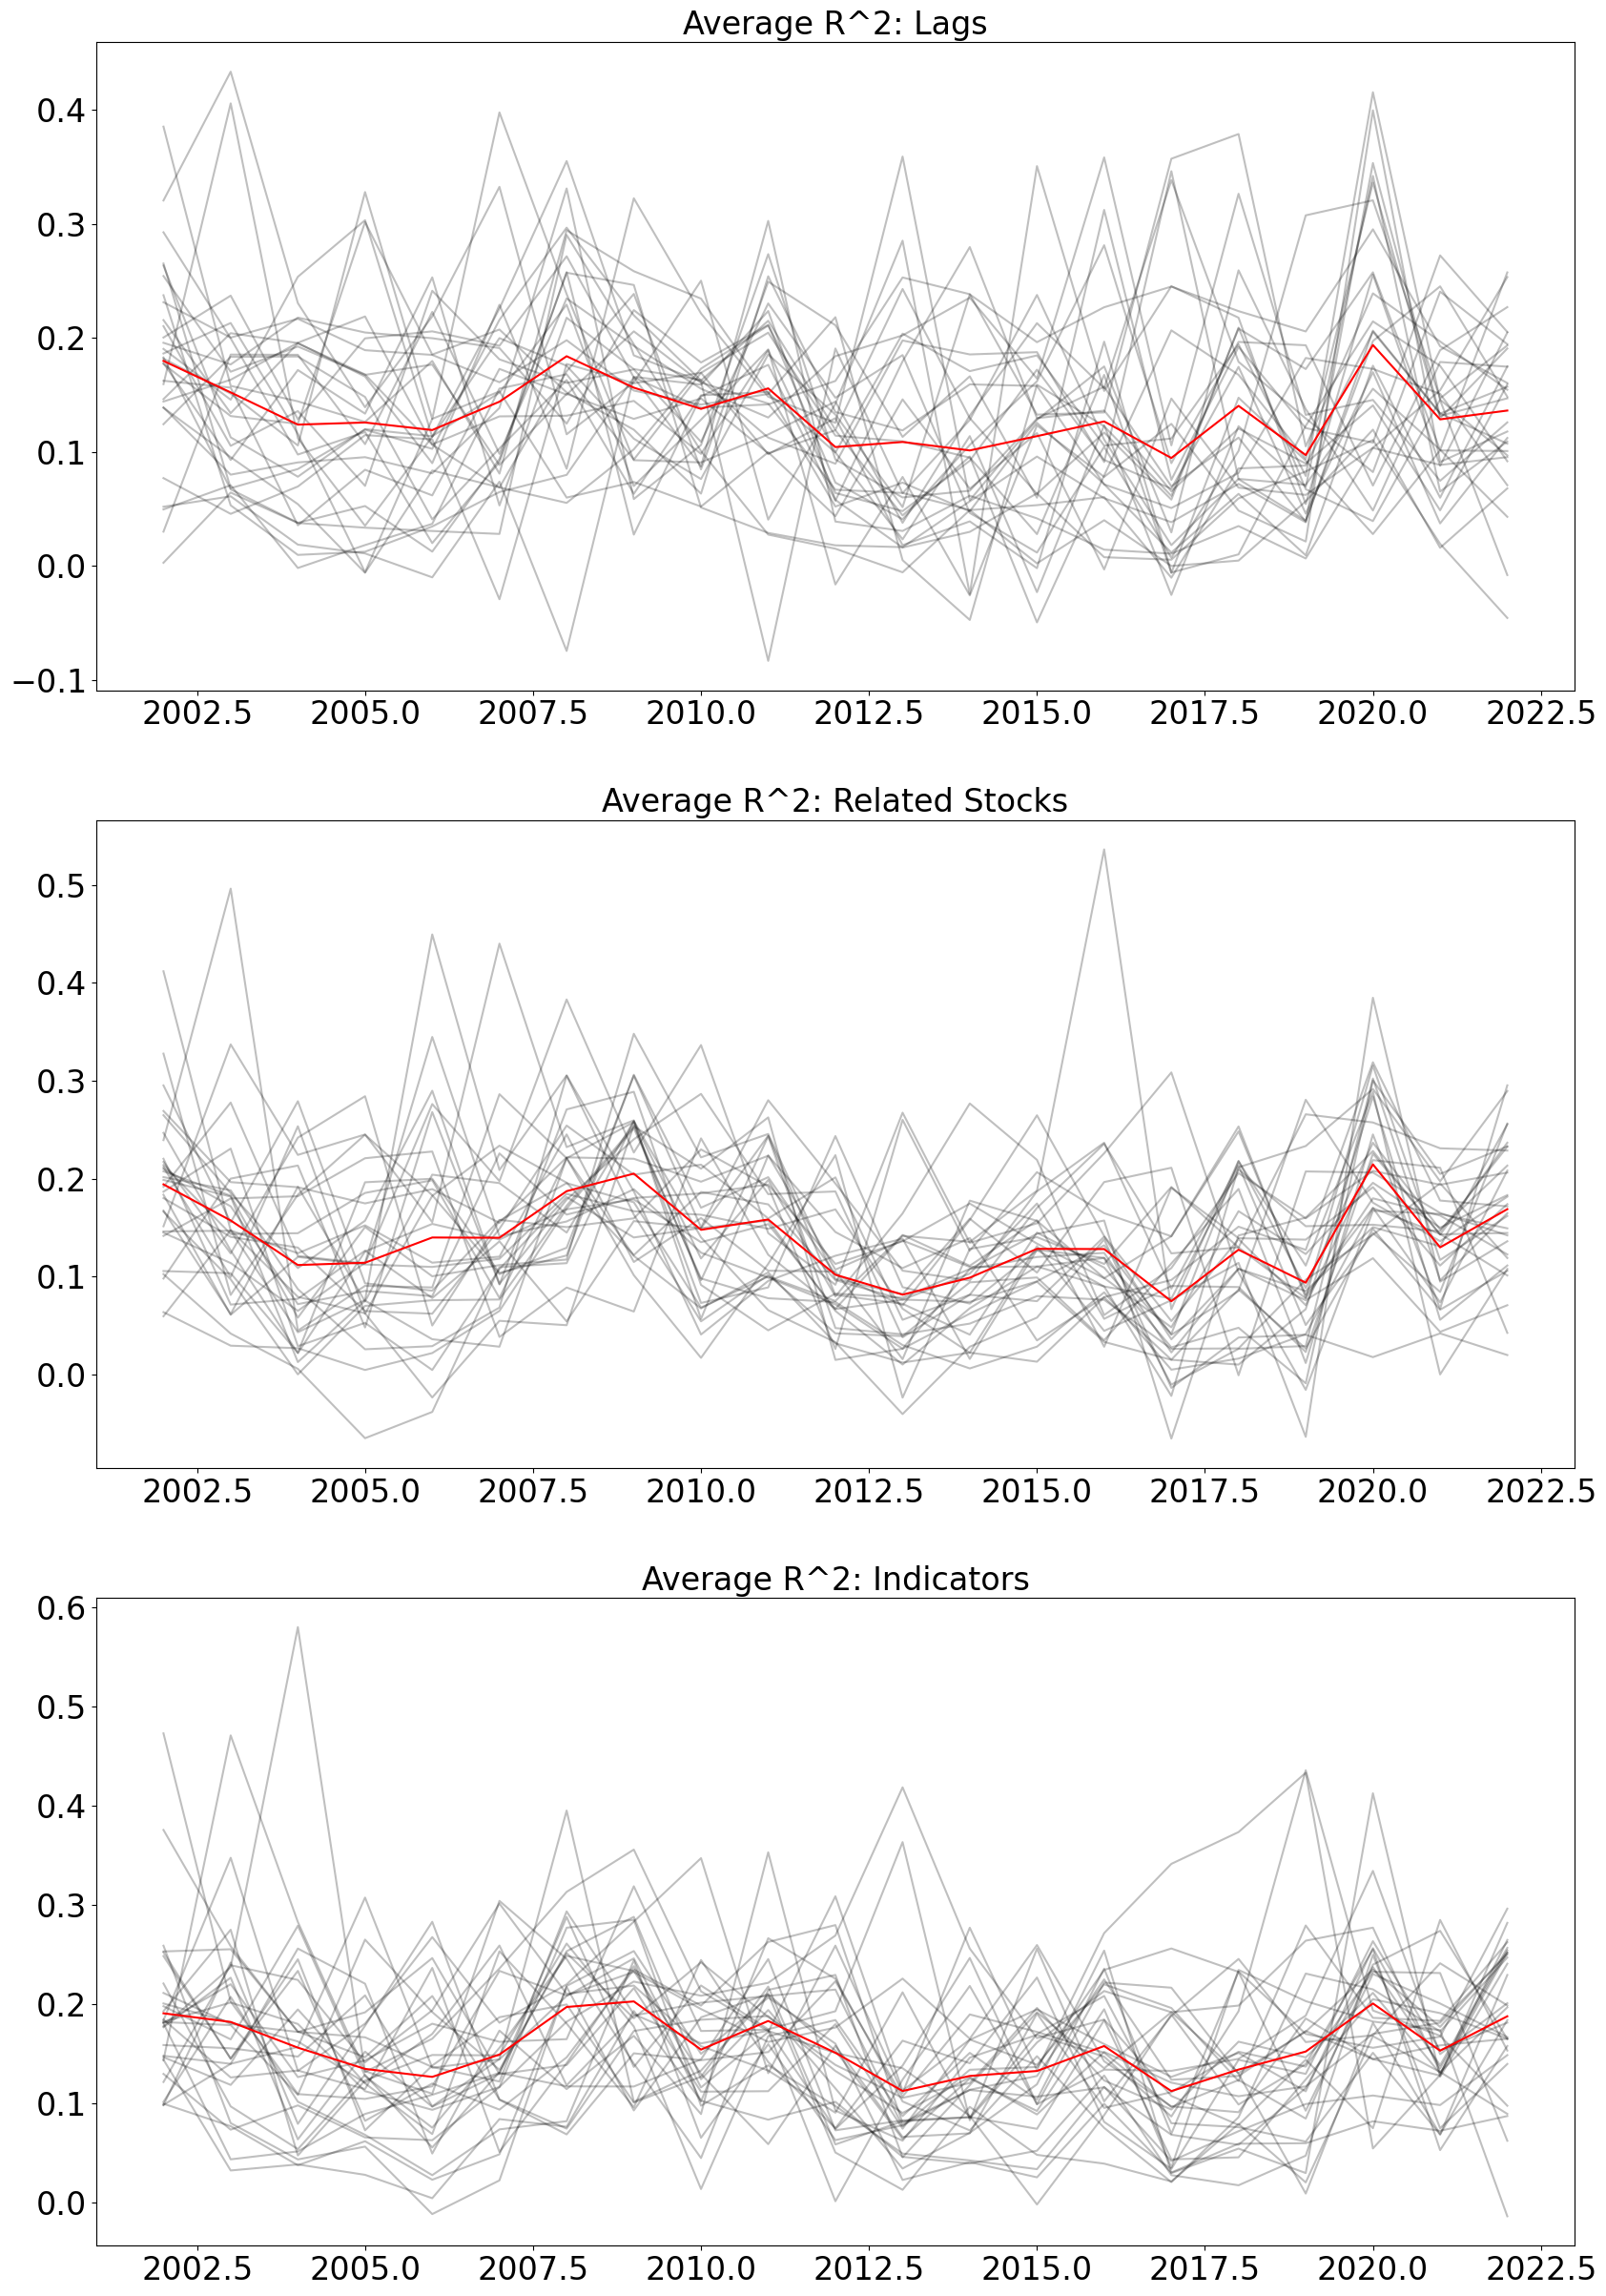

In [35]:
lag_scores = pd.DataFrame(score_dict["lag"])
lag_scores["mean"] = lag_scores.mean(axis = 1)
lag_scores.index = years
related_scores = pd.DataFrame(score_dict["related"])
related_scores["mean"] = related_scores.mean(axis = 1)
related_scores.index = years
indicator_scores = pd.DataFrame(score_dict["indicators"])
indicator_scores["mean"] = indicator_scores.mean(axis = 1)
indicator_scores.index = years
scores_list = [lag_scores, related_scores, indicator_scores]

fig, axs = plt.subplots(3, figsize = (20,30))
plt.rcParams.update({'font.size':24})
axs[0].set_title("Average R^2: Lags", {'fontsize':24})
axs[1].set_title("Average R^2: Related Stocks", {'fontsize':24})
axs[2].set_title("Average R^2: Indicators", {'fontsize':24})
for i in range(3):
    ax = axs[i]
    df = scores_list[i]
    for column in df.columns:
        if column == "mean":
            df[column].plot.line(ax = ax, color = "red")
        else:
            df[column].plot.line(ax = ax, color = "k", alpha = 0.25)

<AxesSubplot: >

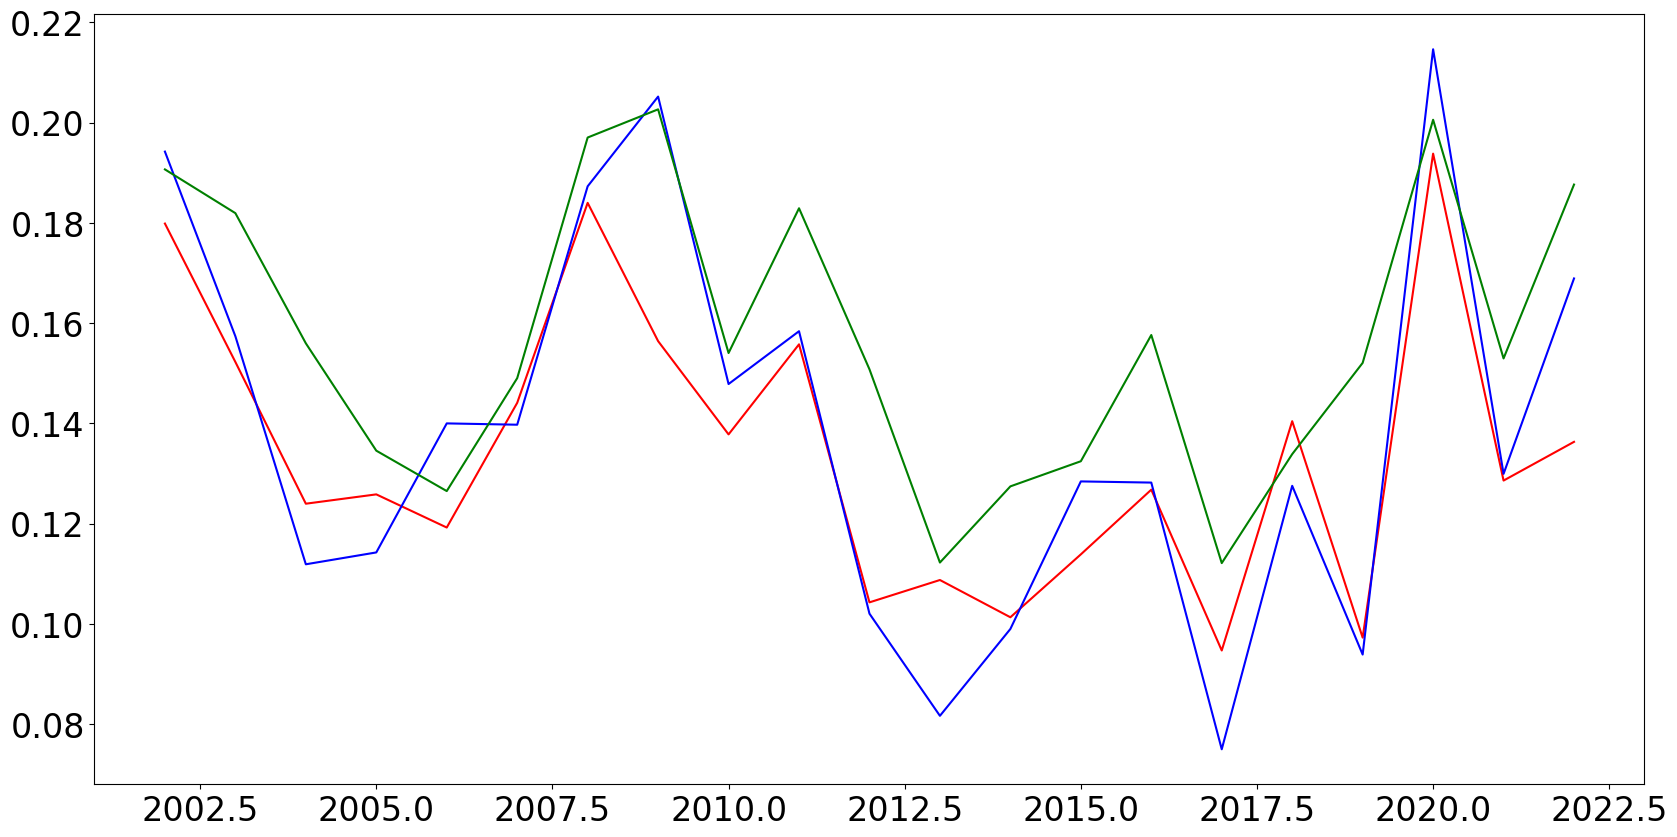

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
lag_scores["mean"].plot.line(ax=ax, color = "red")
related_scores["mean"].plot.line(ax=ax, color = "blue")
indicator_scores["mean"].plot.line(ax=ax, color = "green")

Feature Importance Plots can be generated from the RF models. These plots show the relative importance of each feature to the accuracy of an RF model’s predictions, and the scores generated for each feature take on values that sum to one. For an RF model, feature importance is calculated as the weighted average value of the reduction in impurity in each decision tree weighted by the sample size processed by the tree.

Next, R-squared and Mean Absolute Error (MAE) values are calculated for each stock in each year. These are averaged to produce overall timelines for the years in the dataset. This is constructed for each of the three sets of RF models. Accuracy measures are calculated for the entirety of the year in question regardless of whether an observation was in the training or testing subsets. This is because the training and testing portions are randomly chosen and cannot be ordered as they do not contain dates. While this may inflate the value of the accuracy measures, it is the relative performances that are of interest.

## Results
[FOCUSING ON SINGLE STOCKS]

[ADDITION OF RELATED STOCKS]

[ADDITION OF MACRO VARIABLES]

[SPECIFICALLY DISCUSS GREAT RECESSION AND COVID-19]


## Robustness Checks

Three robustness checks are also conducted to test the strength of the results. First, the accuracy timelines are recreated using only data from the testing subset. This provides a more accurate measurement of the models’ predictive power as the value of the models is their ability to make predictions on unseen data.

The second check increases the prediction time to thirty days. Presumably, this will determine whether the observed trends in predictability are present beyond short-term volatility in prices or if relatively longer-term trends are still predictable. 

The final robustness check reduces the models’ predictions from return values to movement direction (i.e., whether the stock price goes up or down regardless of movement magnitude). This simplifies the task while still providing a useful output. If accurate movement directions can be determined, that would isolate the observed trends in predictability to the magnitude of the price changes. A confusion matrix can then be generated from the resulting models. A confusion matrix is a table that classifies observations into true positives, false positives, true negatives, and false negatives. These values allow other accuracy measures to be calculated such as the accuracy, precision, recall, and F1 score. Accuracy measures the proportion of true predictions out of all predictions. Precision measures the proportion of true positives out of all positive predictions. Recall measures the proportion of true positives out of all actual positives. Finally, the F1 score is the harmonic mean of precision and recall. 


## Conclusion

## References